# Udacity机器学习纳米学位毕业项目——文档分类#

## I. 问题的定义 ##
### 项目概述 ###
文档归类问题所属的研究领域是自然语言处理（简称NLP），它是机器学习技术的一项重要应用，研究的是人与计算机之前如何使用自然语言进行有效通信的方法。
通过对NLP的研究，可以使计算机理解自然语言文本的意义，人类也可以用自己最习惯的语言来使用计算机；人类也可以通过它进一步了解人类语言能力和智能的机制。
目前NLP的主要应用领域有：聊天机器人、智能客服、金融领域的智能理赔、智能投研等。

### 问题的陈述 ###
本项目要解决的一个具体问题是通过对一组经典文本数据（20news-bydate，来自`http://www.qwone.com/~jason/20Newsgroups/`）进行研究，使用NLP的方法进行文档归类，并对分类结果进行评估。

### 评价指标 ###
衡量解决方案的标准主要有：分类模型的准确率

## II. 分析##
### 数据的探索###

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import logging
import sys
import re
import os
import zipfile
import multiprocessing
from time import time
from collections import Counter, defaultdict
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.utils.extmath import density
from sklearn import metrics

from nltk.stem import SnowballStemmer
from nltk import word_tokenize, regexp_tokenize
from nltk.corpus import stopwords
import nltk

from gensim.models import Word2Vec, KeyedVectors

nltk.download('stopwords')

logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')

# #############################################################################
# Choosing which categories to use

all_categories = True

if all_categories:
    categories = ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware',
                  'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
                  'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med',
                  'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast',
                  'talk.politics.misc', 'talk.religion.misc']
else:
    categories = [
        'alt.atheism',
        'talk.religion.misc',
        'comp.graphics',
        'sci.space',
    ]

print("Loading 20 newsgroups dataset for categories:")
print(categories)

data_train = fetch_20newsgroups(subset='train', categories=categories,
                                shuffle=True, random_state=42,
                                remove=())

data_test = fetch_20newsgroups(subset='test', categories=categories,
                               shuffle=True, random_state=42,
                               remove=())
print('data loaded')

# order of labels in `target_names` can be different from `categories`
target_names = data_train.target_names

print("%d documents (training set)" % (
    len(data_train.data)))
print("%d documents (test set)" % (
    len(data_test.data)))
print("%d categories" % len(categories))
print()
print('='*80)
print('20news data samples: ')
print()
print(data_train.data[0])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhanglongyi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Loading 20 newsgroups dataset for categories:
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
data loaded
11314 documents (training set)
7532 documents (test set)
20 categories

20news data samples: 

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from 

### 探索性可视化

### 算法和技术

### 基准模型

Module created for script run in IPython
Usage: twentynewsmodel.py [options]

Options:
  -h, --help         show this help message and exit
  --all_categories   Whether to use all categories or not.
  --words_lemmatize  Whether to use lemmatize data or not.
  --words_stemmer    Whether to use stemmered data or not.
  --stop_words       Whether to use english stopwords of nltk or not.

Loading 20 newsgroups dataset for categories:
['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
data loaded
2034 documents - 3.980MB (training set)
1353 documents - 2.867MB (test set)
4 categories

Extracting features from the training data using a sparse vectorizer
done in 0.625329s at 6.364MB/s
n_samples: 2034, n_features: 33809

Extracting features from the test data using the same vectorizer
done in 0.364864s at 7.859MB/s
n_samples: 1353, n_features: 33809

Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alp

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:319: UserWarning: In Ridge, only 'sag' solver can currently fit the intercept when X is sparse. Solver has been automatically changed into 'sag'.
  warnings.warn("In Ridge, only 'sag' solver can currently fit the "


train time: 0.285s
test time:  0.004s
accuracy:   0.897
dimensionality: 33809
density: 1.000000
top 10 keywords per class:
alt.atheism: atheist osrhe god wingate okcforum caltech islamic atheism keith...
comp.graphics: animation video looking card hi 3d thanks file image graphics
sci.space: digex shuttle flight launch pat moon sci orbit nasa space
talk.religion.misc: jesus mitre hudson morality biblical 2000 beast mr fbi ch...

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.87      0.83      0.85       319
     comp.graphics       0.90      0.98      0.94       389
         sci.space       0.96      0.94      0.95       394
talk.religion.misc       0.83      0.78      0.80       251

       avg / total       0.90      0.90      0.90      1353

confusion matrix:
[[266   9   7  37]
 [  1 381   4   3]
 [  0  22 372   0]
 [ 40  10   6 195]]

Perceptron
___________________________________________________________________________

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.190s
test time:  0.002s
accuracy:   0.885
dimensionality: 33809
density: 0.240165
top 10 keywords per class:
alt.atheism: mantis example religion okcforum rice religious thing keith athe...
comp.graphics: bates albany jr0930 pov video windows package imagine file gra...
sci.space: observations solar comet planets astro moon sci funding orbit space
talk.religion.misc: loving told mr stephen 2000 frank fbi buffalo abortion ch...

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.85      0.81      0.83       319
     comp.graphics       0.91      0.96      0.94       389
         sci.space       0.93      0.94      0.94       394
talk.religion.misc       0.80      0.77      0.79       251

       avg / total       0.88      0.89      0.88      1353

confusion matrix:
[[259   8   9  43]
 [  4 373   9   3]
 [  5  15 372   2]
 [ 36  12   9 194]]

Passive-Aggressive
_____________________________________________________

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.243s
test time:  0.002s
accuracy:   0.873
dimensionality: 33809
density: 0.005561
top 10 keywords per class:
alt.atheism: benedikt rice rushdie wingate bmd islamic atheism wwc keith athe...
comp.graphics: sphere virtual 42 files windows hi image 3d 3do graphics
sci.space: pat henry rockets sunrise dc launch flight moon orbit space
talk.religion.misc: hudson thyagi biblical 2000 abortion kendig hare mitre ch...

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.85      0.75      0.80       319
     comp.graphics       0.89      0.97      0.93       389
         sci.space       0.94      0.94      0.94       394
talk.religion.misc       0.76      0.78      0.77       251

       avg / total       0.87      0.87      0.87      1353

confusion matrix:
[[238  13  11  57]
 [  0 378   7   4]
 [  2  22 369   1]
 [ 39  12   4 196]]

________________________________________________________________________________
Training

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.407s
test time:  0.002s
accuracy:   0.885
dimensionality: 33809
density: 0.020327
top 10 keywords per class:
alt.atheism: rice charley psilink penalty rushdie wingate keith atheists isla...
comp.graphics: file files nl 3d 3do video hi image animation graphics
sci.space: rockets sci nasa breathing moon launch flight dc orbit space
talk.religion.misc: 666 mr 2000 biblical homosexuality hudson abortion beast ...

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.86      0.77      0.81       319
     comp.graphics       0.93      0.96      0.95       389
         sci.space       0.94      0.95      0.94       394
talk.religion.misc       0.76      0.81      0.79       251

       avg / total       0.88      0.88      0.88      1353

confusion matrix:
[[246   7  12  54]
 [  1 374   8   6]
 [  3  14 374   3]
 [ 36   7   5 203]]

Elastic-Net penalty
______________________________________________________________________

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.612s
test time:  0.003s
accuracy:   0.899
dimensionality: 33809
density: 0.187487
top 10 keywords per class:
alt.atheism: okcforum rushdie charley caltech cobb wingate islamic keith athe...
comp.graphics: points computer 42 hi 3do 3d file animation image graphics
sci.space: rockets shuttle planets sci launch dc nasa moon orbit space
talk.religion.misc: homosexuality abortion 666 biblical morality mr 2000 fbi ...

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.87      0.83      0.85       319
     comp.graphics       0.92      0.98      0.95       389
         sci.space       0.95      0.94      0.95       394
talk.religion.misc       0.82      0.80      0.81       251

       avg / total       0.90      0.90      0.90      1353

confusion matrix:
[[264   7   9  39]
 [  0 380   4   5]
 [  2  19 372   1]
 [ 39   7   5 200]]

NearestCentroid (aka Rocchio classifier)
______________________________________________

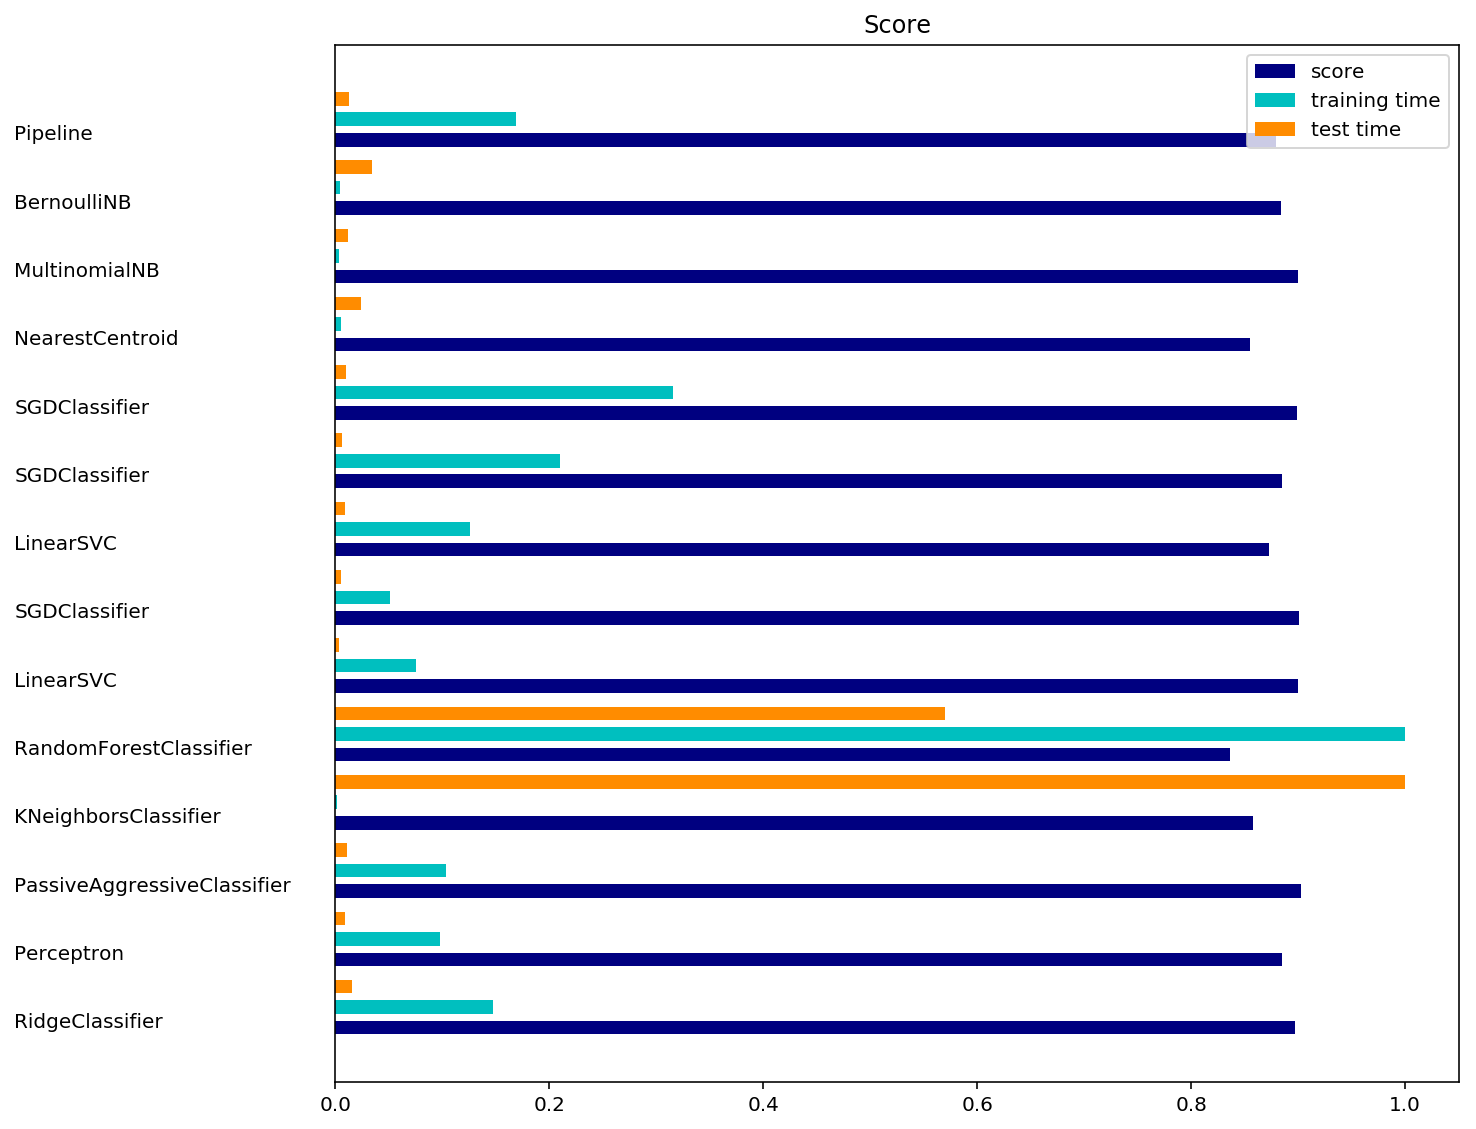

In [2]:
%run twentynewsmodel.py

## III. 方法
### 数据预处理

Built-in functions, exceptions, and other objects.

Noteworthy: None is the `nil' object; Ellipsis represents `...' in slices.
Usage: twentynewsmodel.py [options]

Options:
  -h, --help         show this help message and exit
  --all_categories   Whether to use all categories or not.
  --words_lemmatize  Whether to use lemmatize data or not.
  --words_stemmer    Whether to use stemmered data or not.
  --stop_words       Whether to use english stopwords of nltk or not.

Loading 20 newsgroups dataset for categories:
['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
data loaded
2034 documents - 3.980MB (training set)
1353 documents - 2.867MB (test set)
4 categories

Extracting features from the training data using a sparse vectorizer
done in 7.876091s at 0.505MB/s
n_samples: 2034, n_features: 31569

Extracting features from the test data using the same vectorizer
done in 4.873269s at 0.588MB/s
n_samples: 1353, n_features: 31569

Ridge Classifier
_________________________

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:319: UserWarning: In Ridge, only 'sag' solver can currently fit the intercept when X is sparse. Solver has been automatically changed into 'sag'.
  warnings.warn("In Ridge, only 'sag' solver can currently fit the "


train time: 0.341s
test time:  0.002s
accuracy:   0.900
dimensionality: 31569
density: 1.000000
top 10 keywords per class:
alt.atheism: osrhe atheists wingate god okcforum caltech islamic atheism keit...
comp.graphics: animation hi package card graphics thanks 3d file image graphic
sci.space: planet shuttle flight pat launch moon sci orbit nasa space
talk.religion.misc: mitre beast christians hudson morality biblical 2000 mr f...

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.87      0.84      0.86       319
     comp.graphics       0.91      0.98      0.94       389
         sci.space       0.95      0.94      0.95       394
talk.religion.misc       0.84      0.78      0.81       251

       avg / total       0.90      0.90      0.90      1353

confusion matrix:
[[268   9   8  34]
 [  0 382   3   4]
 [  1  21 372   0]
 [ 38  10   7 196]]

Perceptron
________________________________________________________________________

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.221s
test time:  0.003s
accuracy:   0.902
dimensionality: 31569
density: 0.689315
top 10 keywords per class:
alt.atheism: bobby atheists osrhe cobb okcforum caltech islamic keith atheist...
comp.graphics: 42 card comp graphics package 3d animation file image graphic
sci.space: spacecraft rocket dc shuttle launch sci nasa moon orbit space
talk.religion.misc: buffalo 666 biblical hudson beast morality mr 2000 fbi ch...

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.88      0.84      0.86       319
     comp.graphics       0.92      0.97      0.95       389
         sci.space       0.95      0.95      0.95       394
talk.religion.misc       0.83      0.80      0.81       251

       avg / total       0.90      0.90      0.90      1353

confusion matrix:
[[267   5  10  37]
 [  1 379   5   4]
 [  1  18 375   0]
 [ 36  10   5 200]]

kNN
______________________________________________________________________________

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.318s
test time:  0.001s
accuracy:   0.873
dimensionality: 31569
density: 0.005939
top 10 keywords per class:
alt.atheism: wingate atheists rushdie okcforum islamic atheism bmd atheist ke...
comp.graphics: animation video 42 hi sphere file 3d image 3do graphic
sci.space: nasa pat henry rocket launch flight sunrise moon orbit space
talk.religion.misc: hudson literary kendig 666 biblical 2000 hare mitre chris...

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.85      0.76      0.80       319
     comp.graphics       0.89      0.97      0.93       389
         sci.space       0.94      0.93      0.94       394
talk.religion.misc       0.76      0.77      0.77       251

       avg / total       0.87      0.87      0.87      1353

confusion matrix:
[[241  11  12  55]
 [  0 378   7   4]
 [  2  22 368   2]
 [ 39  12   6 194]]

________________________________________________________________________________
Training:

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.461s
test time:  0.003s
accuracy:   0.884
dimensionality: 31569
density: 0.021184
top 10 keywords per class:
alt.atheism: rushdie bobby charley psilink wingate keith atheists islamic ath...
comp.graphics: pov vesa video computer 3do sphere animation image file graphic
sci.space: sunrise dc nasa rocket sci launch flight moon orbit space
talk.religion.misc: abortion hudson cult biblical beast homosexuality 2000 66...

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.85      0.79      0.82       319
     comp.graphics       0.92      0.97      0.94       389
         sci.space       0.94      0.95      0.94       394
talk.religion.misc       0.77      0.78      0.77       251

       avg / total       0.88      0.88      0.88      1353

confusion matrix:
[[251   6  11  51]
 [  1 376   8   4]
 [  2  15 374   3]
 [ 40  10   6 195]]

Elastic-Net penalty
________________________________________________________________

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.669s
test time:  0.003s
accuracy:   0.901
dimensionality: 31569
density: 0.191881
top 10 keywords per class:
alt.atheism: okcforum caltech charley cobb wingate atheists islamic keith ath...
comp.graphics: package 42 3do computer graphics 3d animation file image graphic
sci.space: rocket dc shuttle planet launch sci nasa moon orbit space
talk.religion.misc: frank abortion morality biblical 666 mr fbi beast 2000 ch...

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.87      0.83      0.85       319
     comp.graphics       0.92      0.98      0.95       389
         sci.space       0.95      0.95      0.95       394
talk.religion.misc       0.82      0.79      0.81       251

       avg / total       0.90      0.90      0.90      1353

confusion matrix:
[[266   6   8  39]
 [  0 381   4   4]
 [  2  18 373   1]
 [ 39   7   6 199]]

NearestCentroid (aka Rocchio classifier)
__________________________________________

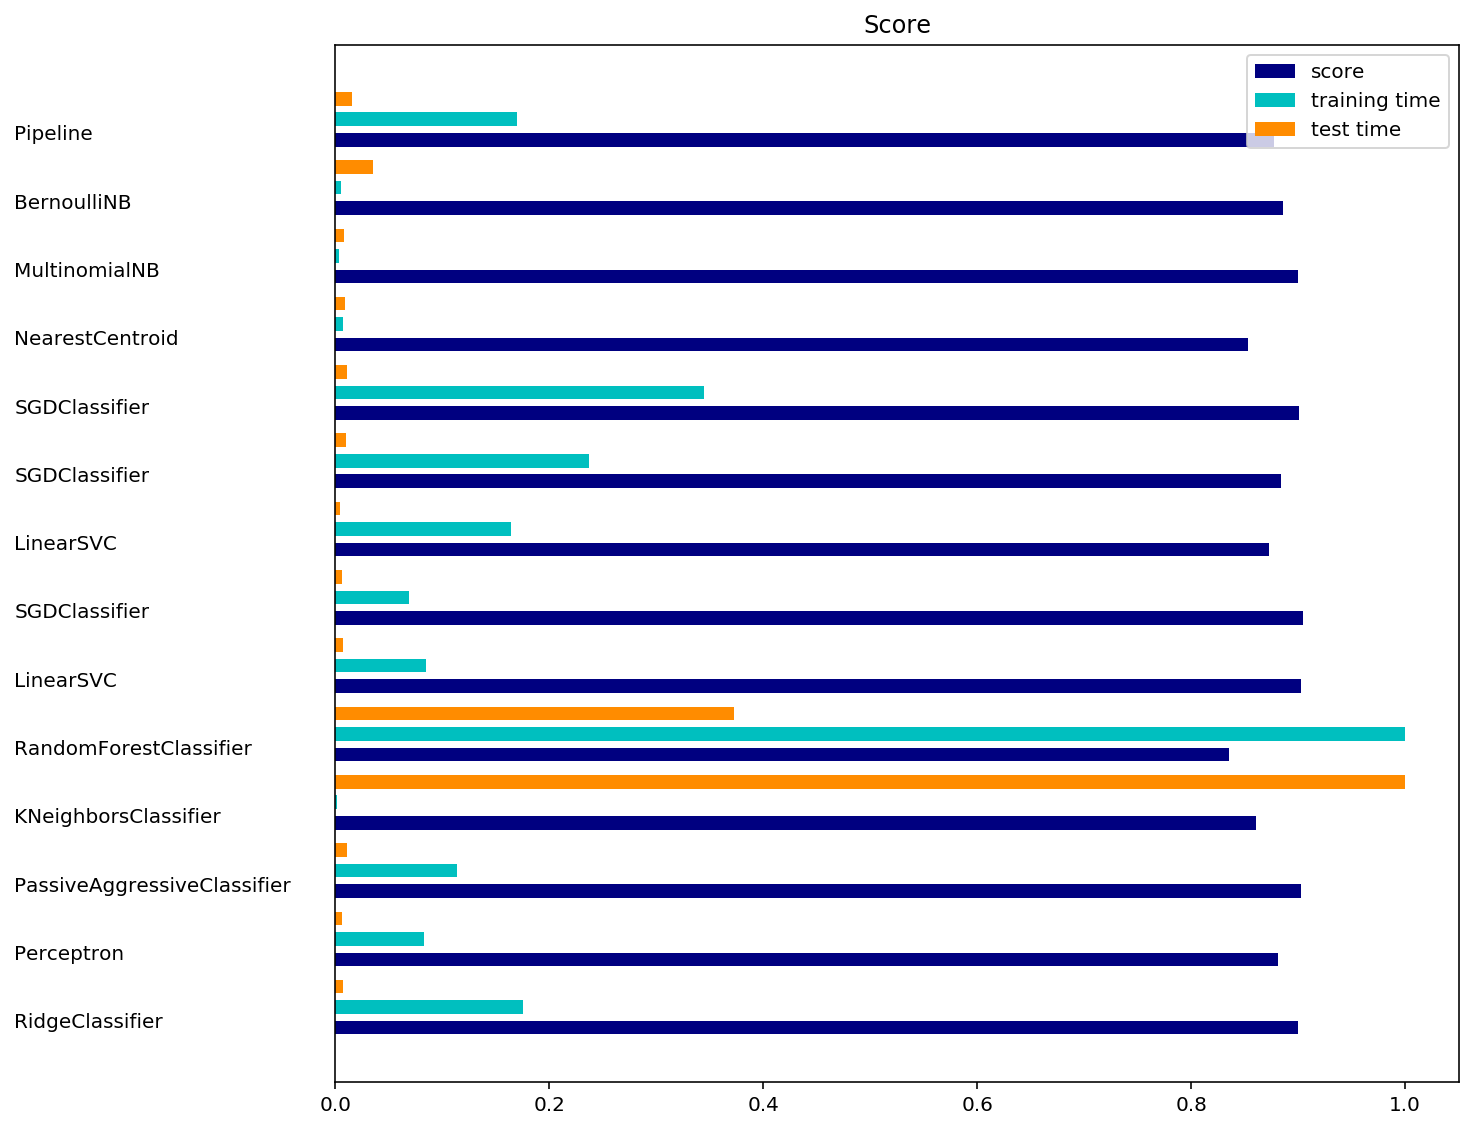

In [3]:
#探索预处理的几个方法-词形还原
%run twentynewsmodel.py --words_lemmatize

Built-in functions, exceptions, and other objects.

Noteworthy: None is the `nil' object; Ellipsis represents `...' in slices.
Usage: twentynewsmodel.py [options]

Options:
  -h, --help         show this help message and exit
  --all_categories   Whether to use all categories or not.
  --words_lemmatize  Whether to use lemmatize data or not.
  --words_stemmer    Whether to use stemmered data or not.
  --stop_words       Whether to use english stopwords of nltk or not.

Loading 20 newsgroups dataset for categories:
['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
data loaded
2034 documents - 3.980MB (training set)
1353 documents - 2.867MB (test set)
4 categories

Extracting features from the training data using a sparse vectorizer
done in 10.991211s at 0.362MB/s
n_samples: 2034, n_features: 25255

Extracting features from the test data using the same vectorizer
done in 8.578299s at 0.334MB/s
n_samples: 1353, n_features: 25255

Ridge Classifier
________________________

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:319: UserWarning: In Ridge, only 'sag' solver can currently fit the intercept when X is sparse. Solver has been automatically changed into 'sag'.
  warnings.warn("In Ridge, only 'sag' solver can currently fit the "
/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


test time:  0.001s
accuracy:   0.904
dimensionality: 25255
density: 1.000000
top 10 keywords per class:
alt.atheism: wwc charley osrh wingat okcforum caltech islam keith atheism ath...
comp.graphics: polygon 42 hi code thank card 3d file imag graphic
sci.space: digex flight pat launch moon sci planet nasa orbit space
talk.religion.misc: koresh mitr moral beast hudson biblic mr 2000 fbi christian

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.88      0.84      0.86       319
     comp.graphics       0.91      0.98      0.95       389
         sci.space       0.95      0.95      0.95       394
talk.religion.misc       0.84      0.80      0.82       251

       avg / total       0.90      0.90      0.90      1353

confusion matrix:
[[267   7   8  37]
 [  1 383   4   1]
 [  0  21 373   0]
 [ 34  10   7 200]]

Perceptron
________________________________________________________________________________
Training: 
Perceptron(alph

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.202s
test time:  0.007s
accuracy:   0.905
dimensionality: 25255
density: 0.689448
top 10 keywords per class:
alt.atheism: cobb charley wwc wingat okcforum caltech islam keith atheism ath...
comp.graphics: code packag comput tiff 42 anim 3d file imag graphic
sci.space: rocket shuttl dc planet nasa launch sci moon orbit space
talk.religion.misc: biblic cult 666 moral beast hudson mr fbi 2000 christian

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.87      0.84      0.85       319
     comp.graphics       0.94      0.97      0.96       389
         sci.space       0.95      0.96      0.96       394
talk.religion.misc       0.82      0.80      0.81       251

       avg / total       0.90      0.90      0.90      1353

confusion matrix:
[[267   4   7  41]
 [  3 378   5   3]
 [  1  14 378   1]
 [ 37   6   7 201]]

kNN
________________________________________________________________________________
Training: 
KNei

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.230s
test time:  0.001s
accuracy:   0.881
dimensionality: 25255
density: 0.007682
top 10 keywords per class:
alt.atheism: benedikt wingat rice scout bmd atheism islam keith wwc atheist
comp.graphics: 42 fractal hi window 3d sphere file imag 3do graphic
sci.space: dc vandal rocket henri sunris flight launch moon orbit space
talk.religion.misc: abort 666 hudson biblic kendig 2000 hare mitr christian fbi

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.87      0.77      0.82       319
     comp.graphics       0.90      0.96      0.93       389
         sci.space       0.94      0.95      0.94       394
talk.religion.misc       0.77      0.79      0.78       251

       avg / total       0.88      0.88      0.88      1353

confusion matrix:
[[245  11  11  52]
 [  0 375   9   5]
 [  1  17 373   3]
 [ 35  13   4 199]]

________________________________________________________________________________
Training: 
SGDCla

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.440s
test time:  0.002s
accuracy:   0.896
dimensionality: 25255
density: 0.025470
top 10 keywords per class:
alt.atheism: penalti psilink perri scout rice wingat keith islam atheism atheist
comp.graphics: 3d code window fractal 42 3do sphere imag file graphic
sci.space: nasa planet sci rocket launch flight moon dc orbit space
talk.religion.misc: biblic abort mr cult beast 666 hudson 2000 fbi christian

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.89      0.80      0.84       319
     comp.graphics       0.92      0.97      0.95       389
         sci.space       0.94      0.95      0.95       394
talk.religion.misc       0.80      0.80      0.80       251

       avg / total       0.90      0.90      0.89      1353

confusion matrix:
[[256   5  11  47]
 [  0 378   8   3]
 [  1  16 376   1]
 [ 31  12   6 202]]

Elastic-Net penalty
______________________________________________________________________________

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.702s
test time:  0.002s
accuracy:   0.905
dimensionality: 25255
density: 0.205573
top 10 keywords per class:
alt.atheism: okcforum rice caltech cobb charley wingat keith islam atheism at...
comp.graphics: packag anim fractal 3do code 3d 42 imag file graphic
sci.space: shuttl rocket sci nasa launch dc moon planet orbit space
talk.religion.misc: abort moral homosexu biblic 666 mr beast fbi 2000 christian

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.88      0.84      0.86       319
     comp.graphics       0.93      0.97      0.95       389
         sci.space       0.95      0.95      0.95       394
talk.religion.misc       0.83      0.80      0.82       251

       avg / total       0.90      0.91      0.90      1353

confusion matrix:
[[269   5   8  37]
 [  3 378   5   3]
 [  1  16 376   1]
 [ 34   7   8 202]]

NearestCentroid (aka Rocchio classifier)
________________________________________________________

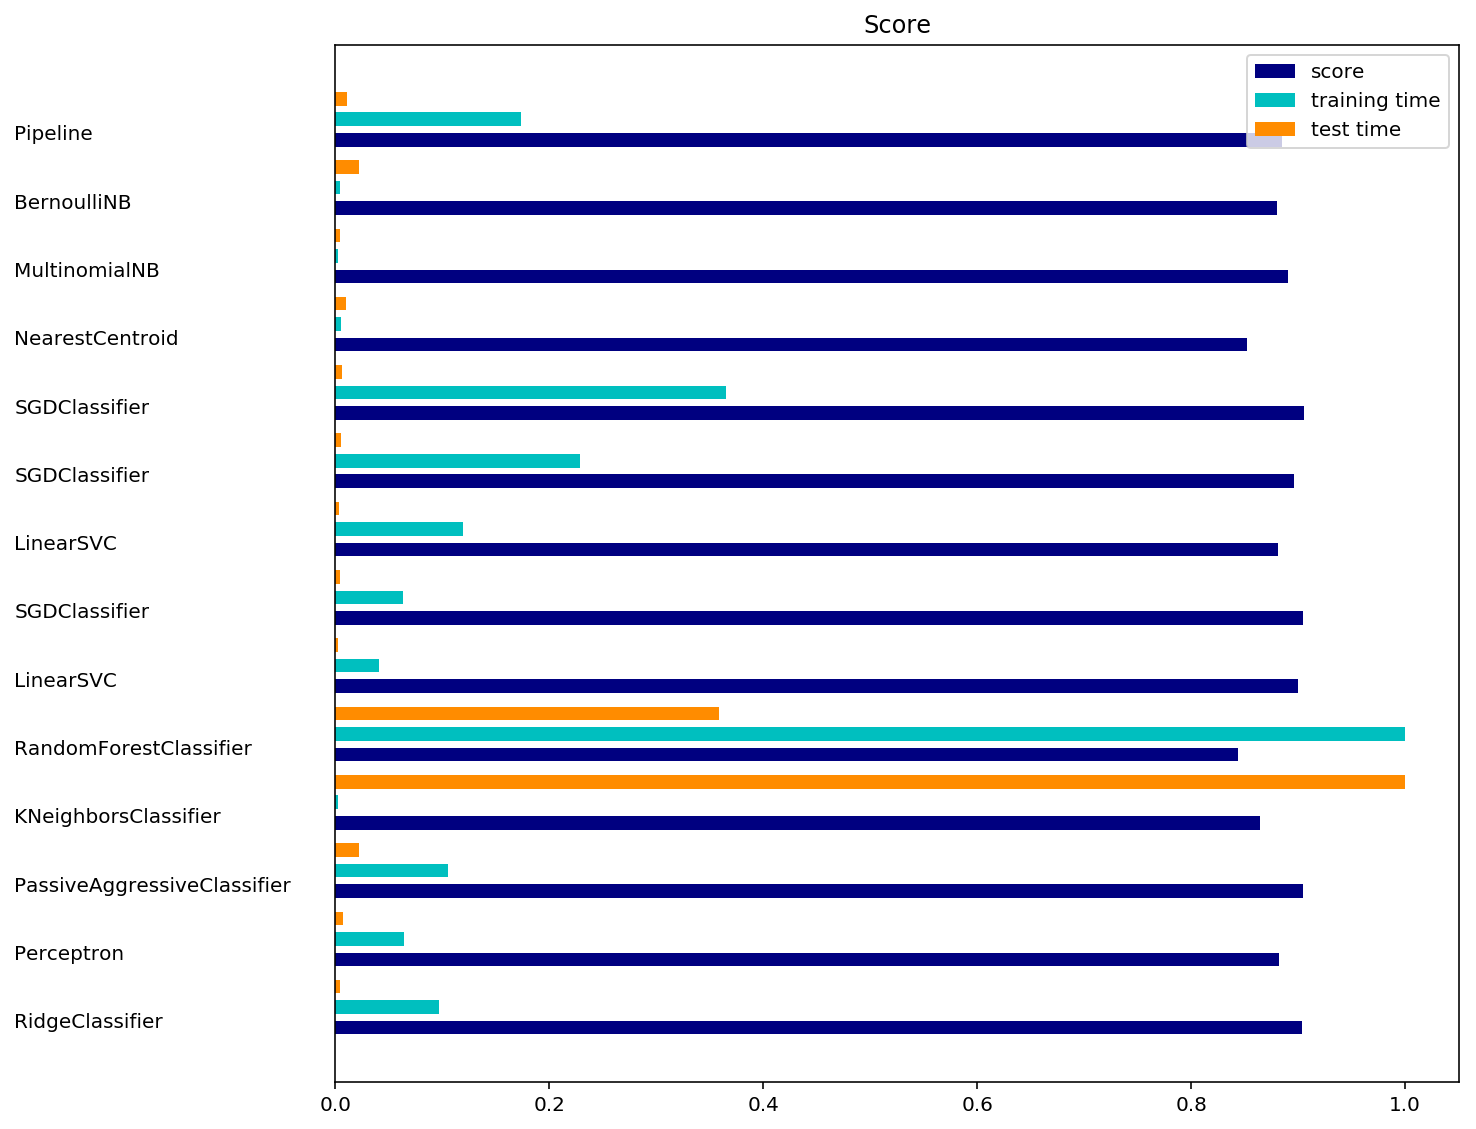

In [4]:
#探索预处理的几个方法-词干提取
%run twentynewsmodel.py --words_stemmer

Module created for script run in IPython
Usage: twentynewsmodel.py [options]

Options:
  -h, --help         show this help message and exit
  --all_categories   Whether to use all categories or not.
  --words_lemmatize  Whether to use lemmatize data or not.
  --words_stemmer    Whether to use stemmered data or not.
  --stop_words       Whether to use english stopwords of nltk or not.

Loading 20 newsgroups dataset for categories:
['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
data loaded
2034 documents - 3.980MB (training set)
1353 documents - 2.867MB (test set)
4 categories

Extracting features from the training data using a sparse vectorizer
done in 170.769724s at 0.023MB/s
n_samples: 2034, n_features: 25248

Extracting features from the test data using the same vectorizer
done in 108.690677s at 0.026MB/s
n_samples: 1353, n_features: 25248

Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:319: UserWarning: In Ridge, only 'sag' solver can currently fit the intercept when X is sparse. Solver has been automatically changed into 'sag'.
  warnings.warn("In Ridge, only 'sag' solver can currently fit the "
/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.093s
test time:  0.002s
accuracy:   0.882
dimensionality: 25248
density: 0.261139
top 10 keywords per class:
alt.atheism: absurd gap caltech religi islam cobb belief atheism keith atheist
comp.graphics: 42 sdsu copyright ati quicktim file ritter fractal anim graphic
sci.space: dream compani cold launch nasa astronomi rocket moon orbit space
talk.religion.misc: mr com cathol object frank 666 hudson abort 2000 christian

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.86      0.83      0.85       319
     comp.graphics       0.92      0.94      0.93       389
         sci.space       0.92      0.93      0.92       394
talk.religion.misc       0.79      0.79      0.79       251

       avg / total       0.88      0.88      0.88      1353

confusion matrix:
[[265   9   9  36]
 [  5 364  12   8]
 [  5  14 367   8]
 [ 32   9  12 198]]

Passive-Aggressive
______________________________________________________________

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


test time:  0.184s
accuracy:   0.865
classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.77      0.90      0.83       319
     comp.graphics       0.90      0.91      0.91       389
         sci.space       0.91      0.91      0.91       394
talk.religion.misc       0.87      0.67      0.76       251

       avg / total       0.87      0.86      0.86      1353

confusion matrix:
[[287   3  10  19]
 [ 15 355  14   5]
 [  7  26 360   1]
 [ 62  10  11 168]]

Random forest
________________________________________________________________________________
Training: 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.193s
test time:  0.001s
accuracy:   0.882
dimensionality: 25248
density: 0.007614
top 10 keywords per class:
alt.atheism: benedikt wingat rice scout bmd atheism islam keith wwc atheist
comp.graphics: code 42 hi 3d window sphere file imag 3do graphic
sci.space: pat dc vandal rocket henri flight launch moon orbit space
talk.religion.misc: abort hudson 666 biblic kendig 2000 hare mitr christian fbi

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.87      0.77      0.82       319
     comp.graphics       0.91      0.97      0.94       389
         sci.space       0.94      0.94      0.94       394
talk.religion.misc       0.76      0.79      0.78       251

       avg / total       0.88      0.88      0.88      1353

confusion matrix:
[[247   7  12  53]
 [  0 376   8   5]
 [  1  18 372   3]
 [ 36  13   4 198]]

________________________________________________________________________________
Training: 
SGDClassifie

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.339s
test time:  0.002s
accuracy:   0.899
dimensionality: 25248
density: 0.025190
top 10 keywords per class:
alt.atheism: rice rushdi charley psilink wingat scout keith islam atheism ath...
comp.graphics: window 42 vesa hi fractal 3do sphere imag file graphic
sci.space: planet sunset nasa rocket flight launch dc moon orbit space
talk.religion.misc: biblic mitr beast abort 666 mr hudson 2000 fbi christian

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.88      0.81      0.85       319
     comp.graphics       0.93      0.97      0.95       389
         sci.space       0.93      0.96      0.95       394
talk.religion.misc       0.82      0.81      0.81       251

       avg / total       0.90      0.90      0.90      1353

confusion matrix:
[[259   5  13  42]
 [  2 376   8   3]
 [  1  14 378   1]
 [ 31  11   6 203]]

Elastic-Net penalty
___________________________________________________________________________

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.518s
test time:  0.002s
accuracy:   0.908
dimensionality: 25248
density: 0.206303
top 10 keywords per class:
alt.atheism: osrh rice caltech cobb charley wingat islam keith atheism atheist
comp.graphics: packag anim fractal code 3d 3do 42 file imag graphic
sci.space: shuttl rocket sci dc launch nasa moon planet orbit space
talk.religion.misc: hudson moral homosexu 666 biblic mr beast fbi 2000 christian

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.88      0.84      0.86       319
     comp.graphics       0.93      0.97      0.95       389
         sci.space       0.96      0.95      0.95       394
talk.religion.misc       0.83      0.82      0.83       251

       avg / total       0.91      0.91      0.91      1353

confusion matrix:
[[269   6   7  37]
 [  3 378   5   3]
 [  1  17 375   1]
 [ 34   6   5 206]]

NearestCentroid (aka Rocchio classifier)
_________________________________________________________

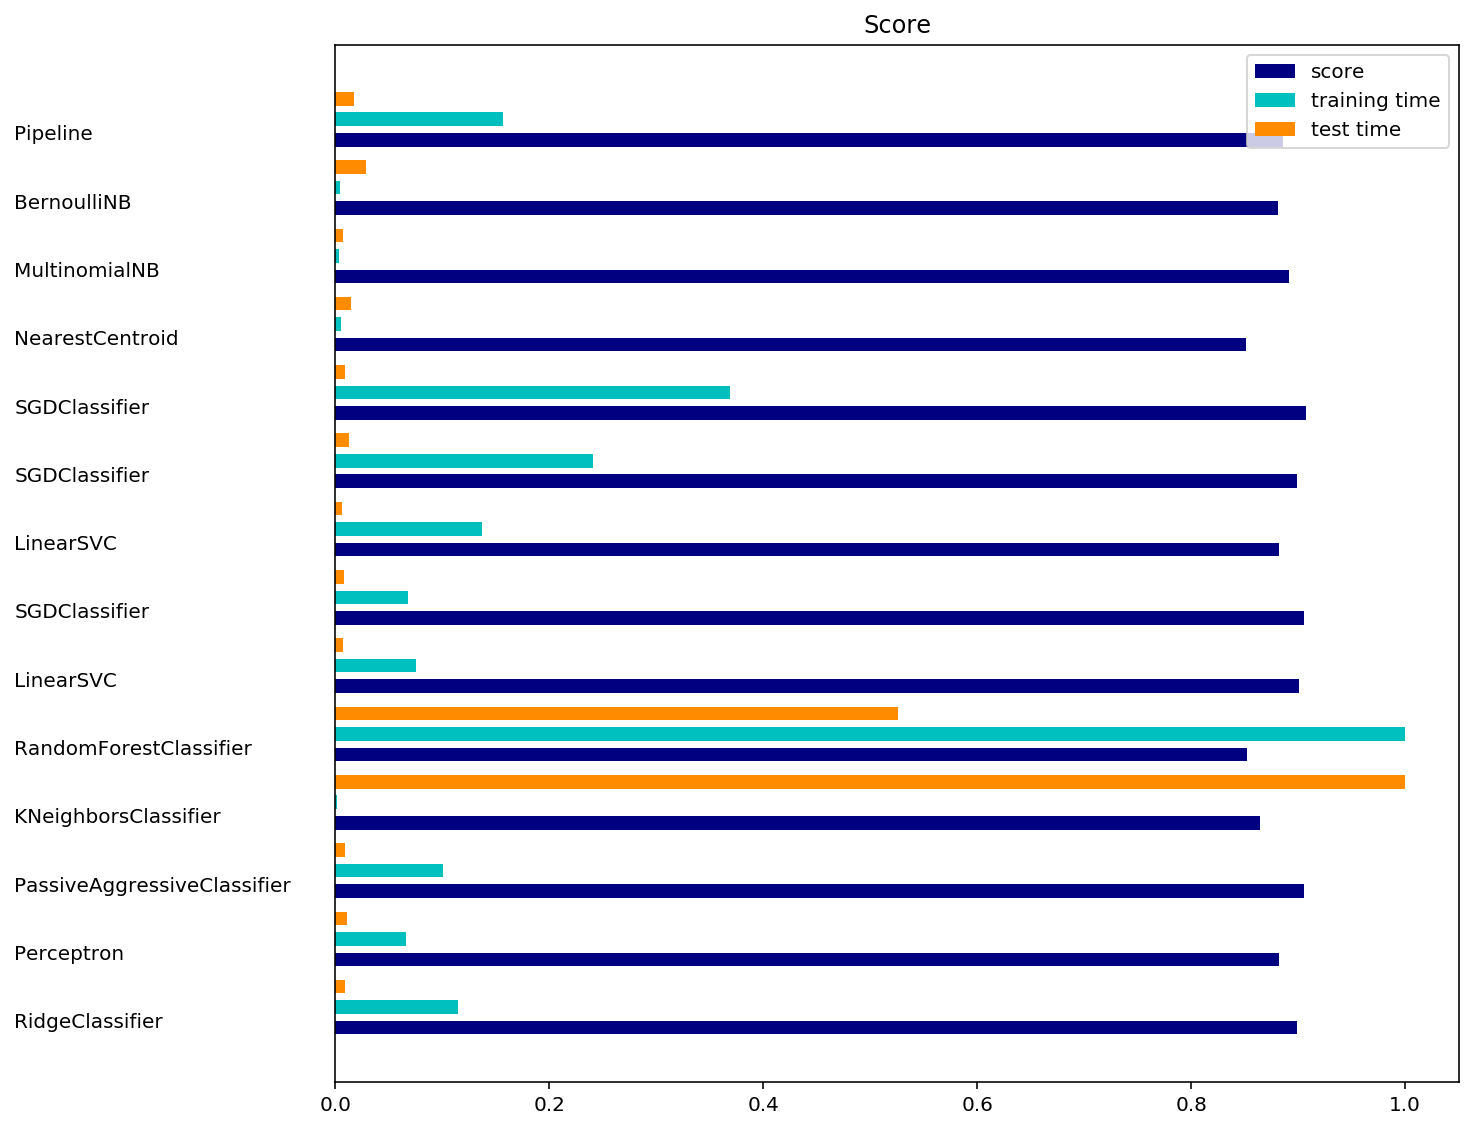

In [2]:
#词干提取+停止词
%run twentynewsmodel.py --words_stemmer --stop_words

In [3]:
#生成20news-no-stop

def preprocess(data):
    stemmer = SnowballStemmer("english")
    stop_words = stopwords.words('english')
    data_nopara = [" ".join(document.split("\n")) for document in data]
    data_tokenized = [[word.lower() for word in regexp_tokenize(document, "\\b[a-zA-Z]{3,}\\b")] 
                      for document in data_nopara]
    #data_stemmer = [[stemmer.stem(word) for word in document] for document in data_tokenized]
    return [[word for word in document if not word in stop_words] 
            for document in data_tokenized]

t0 = time()
data_train_original = fetch_20newsgroups(subset='train', categories=categories,
                                shuffle=True, random_state=42, remove=())

data_train_noheaders = fetch_20newsgroups(subset='train', categories=categories,
                                shuffle=True, random_state=42, remove=('headers'))

data_nh_train = []
for A,B in zip(data_train_original.data, data_train_noheaders.data):
    for a in A.split('\n'):
        if a[:8]=='Subject:':
            data_nh_train.append(a[9:]+' '+B)
            break
            
#####################################
#X_nh_train - 预处理后的训练集
X_nh_train = preprocess(data_nh_train)
data_train_input = [' '.join(document) for document in X_nh_train]


data_test_original = fetch_20newsgroups(subset='test', categories=categories,
                                shuffle=True, random_state=42, remove=())

data_test_noheaders = fetch_20newsgroups(subset='test', categories=categories,
                                shuffle=True, random_state=42, remove=('headers'))

data_nh_test = []
for A,B in zip(data_test_original.data, data_test_noheaders.data):
    for a in A.split('\n'):
        if a[:8]=='Subject:':
            data_nh_test.append(a[9:]+' '+B)
            break

#####################################
#X_nh_test - 预处理后的测试集
X_nh_test = preprocess(data_nh_test)
data_test_input = [' '.join(document) for document in X_nh_train]

y_nh_train, y_nh_test = data_train_original.target, data_test_original.target

duration = time() - t0
print ("Total preprocessing time: %0.3f seconds" % duration)

Total preprocessing time: 2.919 seconds


### 执行过程

In [14]:
#对所有数据做word2vec 
t0 = time()
all_data_nh = np.append(X_nh_train, X_nh_test)
all_words = set(word for document in all_data_nh for word in document)

size = 250
model = Word2Vec(all_data_nh, size=size, alpha=0.05, window=30, min_count=5, workers=multiprocessing.cpu_count())
#w2v = {word: vec for word, vec in zip(model.wv.index2word, model.wv.syn0)}
#w2v = {word: vec for word, vec in model.wv.vectors}
w2v = model.wv
duration = time() - t0
print ("Total word2vec processing time: %0.3f seconds" % duration)

2018-05-24 18:00:43,332 WARNING consider setting layer size to a multiple of 4 for greater performance
2018-05-24 18:00:43,333 INFO collecting all words and their counts
2018-05-24 18:00:43,334 INFO PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-05-24 18:00:43,495 INFO collected 34101 word types from a corpus of 527729 raw words and 3387 sentences
2018-05-24 18:00:43,496 INFO Loading a fresh vocabulary
2018-05-24 18:00:43,547 INFO min_count=5 retains 11737 unique words (34% of original 34101, drops 22364)
2018-05-24 18:00:43,549 INFO min_count=5 leaves 488075 word corpus (92% of original 527729, drops 39654)
2018-05-24 18:00:43,589 INFO deleting the raw counts dictionary of 34101 items
2018-05-24 18:00:43,590 INFO sample=0.001 downsamples 15 most-common words
2018-05-24 18:00:43,591 INFO downsampling leaves estimated 477891 word corpus (97.9% of prior 488075)
2018-05-24 18:00:43,637 INFO estimated required memory for 11737 words and 250 dimensions: 29342500 byte

Total word2vec processing time: 6.935 seconds


In [5]:
#接入现成的词向量glove6B和30B
import urllib
from tqdm import tqdm

def mkdir(path):
    path=path.strip()
    path=path.rstrip("\\")
    isExists=os.path.exists(path)
    if not isExists:
        os.makedirs(path)
        return True
    else:
        return False
mkdir('data/model')

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

t0 = time()
glove6B_zip_path = 'data/glove.6B.zip'
glove6B_folder_path = 'data/golve.6B'
        
if not os.path.isfile(glove6B_zip_path):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='glove6B Dataset') as pbar:
        urllib.request.urlretrieve(
            'http://nlp.stanford.edu/data/glove.6B.zip',
            glove6B_zip_path,
            pbar.hook)
    
if not os.path.isdir(glove6B_folder_path):
    with zipfile.ZipFile(glove6B_zip_path) as zipex:
        zipex.extractall(glove6B_folder_path)
        zipex.close()


glove840B300d_zip_path = 'data/glove.840B.300d.zip'
glove840B300d_folder_path = 'data/glove.840B.300d'
        
if not os.path.isfile(glove840B300d_zip_path):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='glove840B300d Dataset') as pbar:
        urllib.request.urlretrieve(
            'http://nlp.stanford.edu/data/glove.840B.300d.zip',
            glove840B300d_zip_path,
            pbar.hook)
    
if not os.path.isdir(glove840B300d_folder_path):
    with zipfile.ZipFile(glove840B300d_zip_path) as zipex:
        zipex.extractall(glove840B300d_folder_path)
        zipex.close()
duration = time() - t0              
print('All files ready!')
print("Total glove-vectors download&extract time: %0.3f seconds" % duration)

All files ready!
Total glove-vectors download&extract time: 0.000 seconds


In [6]:
#接入现成的词向量glove6B和30B
GLOVE_6B_50D_PATH = 'data/golve.6B/glove.6B.50d.txt'
GLOVE_840B_300D_PATH = 'data/glove.840B.300d/glove.840B.300d.txt'
encoding = 'utf-8'
t0 = time()
glove_small = {}
with open(GLOVE_6B_50D_PATH, "rb") as infile:
    for line in infile:
        parts = line.split()
        word = parts[0].decode(encoding)
        if (word in all_words):
            nums=np.array(parts[1:], dtype=np.float32)
            glove_small[word] = nums

            
glove_big = {}
with open(GLOVE_840B_300D_PATH, "rb") as infile:
    for line in infile:
        parts = line.split()
        word = parts[0].decode(encoding)
        if word in all_words:
            nums=np.array(parts[1:], dtype=np.float32)
            glove_big[word] = nums
            
duration = time() - t0
print ("Total glove-vectors processing time: %0.3f seconds" % duration)

Total glove-vectors processing time: 40.408 seconds


In [7]:
def benchmark(clf, data_train, data_test):
    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(data_train, y_nh_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(data_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(y_nh_test, pred)
    print("accuracy:   %0.3f" % score)
    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr, score, train_time, test_time

def trainandplot(data_train, data_test):
    results = []
    
    
    print('=' * 80)
    print("Ridge Classifier")
    results.append(benchmark(RidgeClassifier(tol=1e-2, solver="lsqr"), data_train, data_test))

    for penalty in ["l2", "l1"]:
        print('=' * 80)
        print("%s penalty" % penalty.upper())
        results.append(benchmark(LinearSVC(penalty=penalty, dual=False,
                                           tol=1e-3), data_train, data_test))
        # Train SGD model
        results.append(benchmark(SGDClassifier(alpha=.0001, n_iter=50,
                                               penalty=penalty), data_train, data_test))

    # Train SGD with Elastic Net penalty
    print('=' * 80)
    print("Elastic-Net penalty")
    results.append(benchmark(SGDClassifier(alpha=.0001, n_iter=50,
                                           penalty="elasticnet"), data_train, data_test))

    print('=' * 80)
    print("LinearSVC with L1-based feature selection")
    # The smaller C, the stronger the regularization.
    # The more regularization, the more sparsity.
    results.append(benchmark(Pipeline([
        ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False,
                                                  tol=1e-3))),
        ('classification', LinearSVC(penalty="l2"))]), data_train, data_test))
    
    
    #Train extra trees Classifiers
    print('=' * 80)
    print("extra trees")
    results.append(benchmark(ExtraTreesClassifier(n_estimators=200), data_train, data_test)) 


    indices = np.arange(len(results))

    results = [[x[i] for x in results] for i in range(4)]

    clf_names, score, training_time, test_time = results
    training_time = np.array(training_time) / np.max(training_time)
    test_time = np.array(test_time) / np.max(test_time)

    plt.figure(figsize=(12, 8))
    plt.title("Score")
    plt.barh(indices, score, .2, label="score", color='navy')
    plt.barh(indices + .3, training_time, .2, label="training time",
             color='c')
    plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
    plt.yticks(())
    plt.legend(loc='best')
    plt.subplots_adjust(left=.25)
    plt.subplots_adjust(top=.95)
    plt.subplots_adjust(bottom=.05)

    for i, c in zip(indices, clf_names):
        plt.text(-.3, i, c)

    plt.show()
    
    return results

In [8]:
#方法1：依照w2v模型对每篇文档词向量求均值，并使用分类模型进行分类

def w2v_mean_glob(data):
    return np.array([np.mean([glove_big[word] for word in document if word in glove_big] 
                             or [np.zeros(300)], axis = 0) for document in data])
    
def w2v_mean(data):
    return np.array([np.mean([w2v[word] for word in document if word in w2v] 
                             or [np.zeros(size)], axis = 0) for document in data])

    
X_w2vm_glob_train = w2v_mean_glob(X_nh_train)
X_w2vm_glob_test = w2v_mean_glob(X_nh_test)

X_w2vm_train = w2v_mean(X_nh_train)
X_w2vm_test = w2v_mean(X_nh_test)

Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='lsqr',
        tol=0.01)
train time: 0.023s
test time:  0.000s
accuracy:   0.840

L2 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.001,
     verbose=0)
train time: 0.163s
test time:  0.000s
accuracy:   0.856

________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=5

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.092s
test time:  0.002s
accuracy:   0.827

L1 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
     verbose=0)
train time: 1.823s
test time:  0.001s
accuracy:   0.851

________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=50,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.222s
test time:  0.001s
accuracy:   0.840

Elastic-Net penalty
________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=50,
       n_jobs=1, penalty='elasticnet', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.257s
test time:  0.001s
accuracy:   0.846

LinearSVC with L1-based feature selection
________________________________________________________________________________
Training: 
Pipeline(memory=None,
     steps=[('feature_selection', SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
     verbose=0),
        norm_order=1, prefit=...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])
train time: 2.589s
test time:  0.001s
accuracy:   0.856

extra trees
________________________________________________________________________________
Training: 
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
         

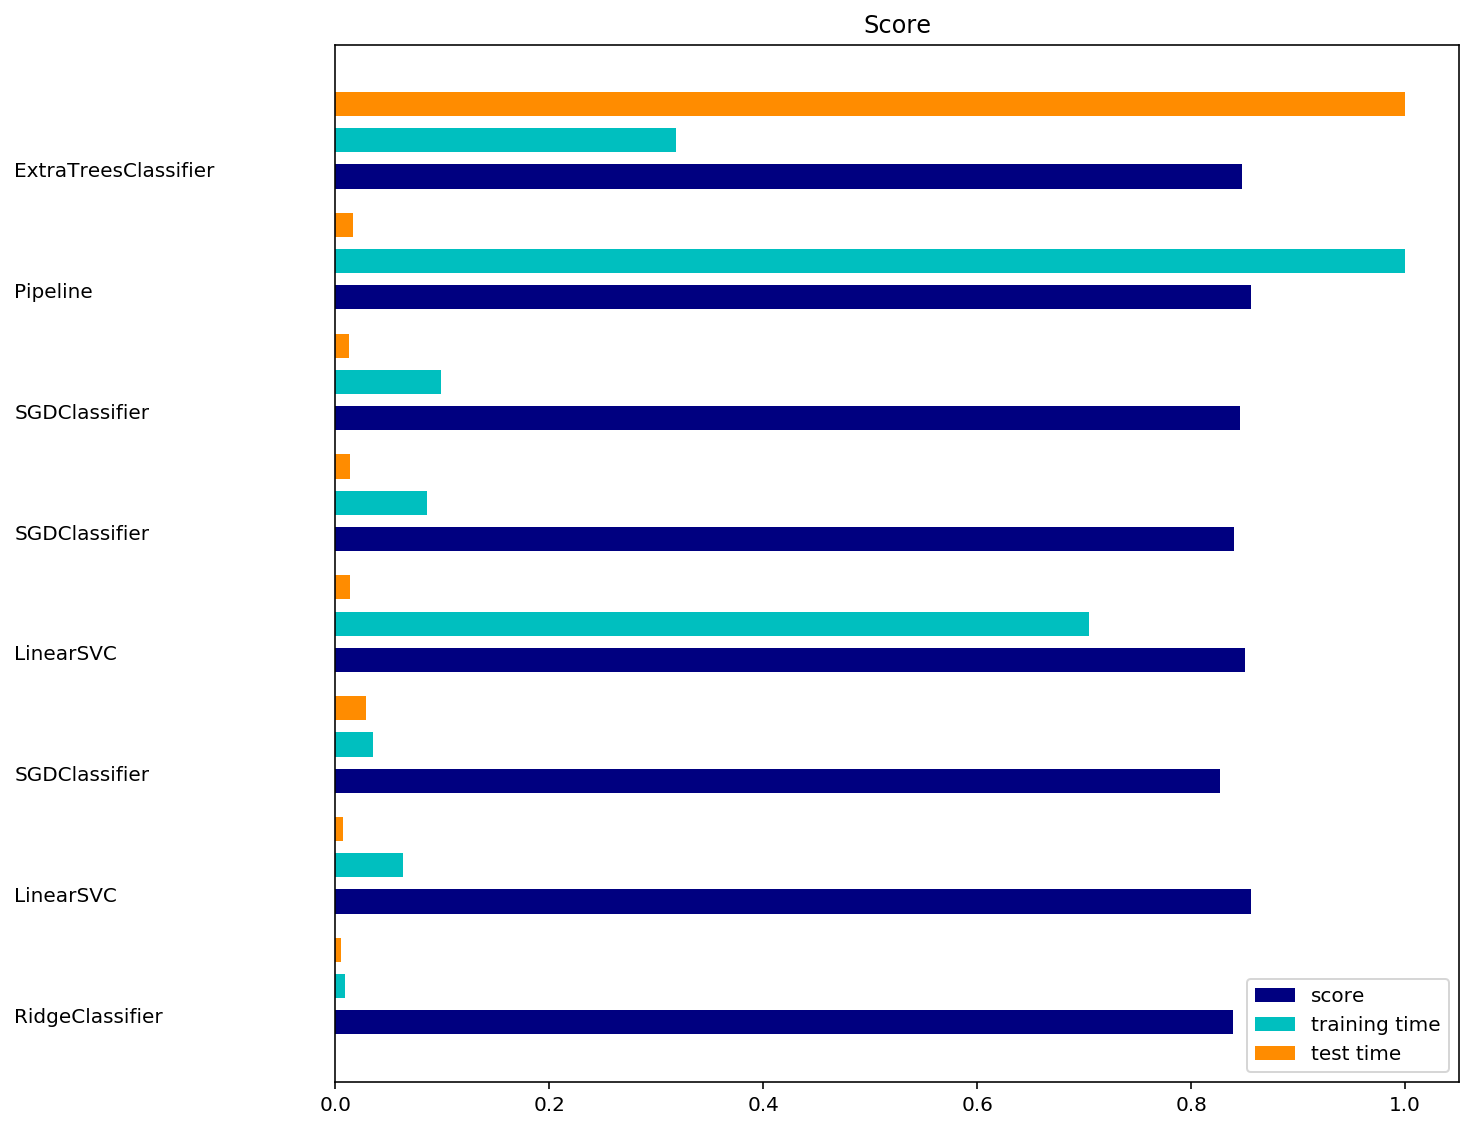

the best model is: LinearSVC, the accuracy is: 0.856
the best model is: Pipeline, the accuracy is: 0.856


In [15]:
results_model1 = trainandplot(X_w2vm_train, X_w2vm_test)
for i in range(0,8):
    if results_model1[1][i] == max(results_model1[1]):
        print ('the best model is: %s, the accuracy is: %0.3f'%(results_model1[0][i], results_model1[1][i]))

In [16]:
#方法2：在方法1的基础上，使用tfidf对每个词加权求均值，并使用分类模型进行分类

print("Extracting features from the training data using a sparse vectorizer")
t0 = time()
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                                 stop_words='english')

X_tfidf_train = vectorizer.fit_transform([' '.join(document) for document in all_data_nh])
duration = time() - t0
print("n_samples: %d, n_features: %d" % X_tfidf_train.shape)
print()

print("Extracting features from the test data using the same vectorizer")

#X_tfidf_test = vectorizer.transform([' '.join(document) for document in X_ns_test])
#print("n_samples: %d, n_features: %d" % X_tfidf_test.shape)
#print()
duration = time() - t0
print ("Total tfidf procesing time: %0.3f seconds" % duration)


t0 = time()
max_idf = max(vectorizer.idf_)
word2weight = defaultdict(lambda: max_idf, [(word, vectorizer.idf_[index]) 
                                            for word, index in vectorizer.vocabulary_.items()])

def w2v_tfidf(data):
    return np.array([np.mean([w2v[word] * word2weight[word]  for word in document if word in w2v]
                  or [np.zeros(size)], axis = 0) for document in data])

X_w2v_tfidf_train = w2v_tfidf(X_nh_train)
X_w2v_tfidf_test = w2v_tfidf(X_nh_test)

duration = time() - t0
print ("Total tfidf classification vectors processing time: %0.3f seconds" % duration)

Extracting features from the training data using a sparse vectorizer
n_samples: 3387, n_features: 33916

Extracting features from the test data using the same vectorizer
Total tfidf procesing time: 0.688 seconds
Total tfidf classification vectors processing time: 11.641 seconds


Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='lsqr',
        tol=0.01)
train time: 0.028s
test time:  0.001s
accuracy:   0.850

L2 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.001,
     verbose=0)
train time: 0.825s
test time:  0.002s
accuracy:   0.876

________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=5

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 6.245s
test time:  0.001s
accuracy:   0.859

________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=50,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.577s
test time:  0.002s
accuracy:   0.850

Elastic-Net penalty
________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=50,
       n_jobs=1, penalty='elasticnet', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.507s
test time:  0.002s
accuracy:   0.823

LinearSVC with L1-based feature selection
________________________________________________________________________________
Training: 
Pipeline(memory=None,
     steps=[('feature_selection', SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
     verbose=0),
        norm_order=1, prefit=...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])
train time: 7.842s
test time:  0.002s
accuracy:   0.873

extra trees
________________________________________________________________________________
Training: 
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
         

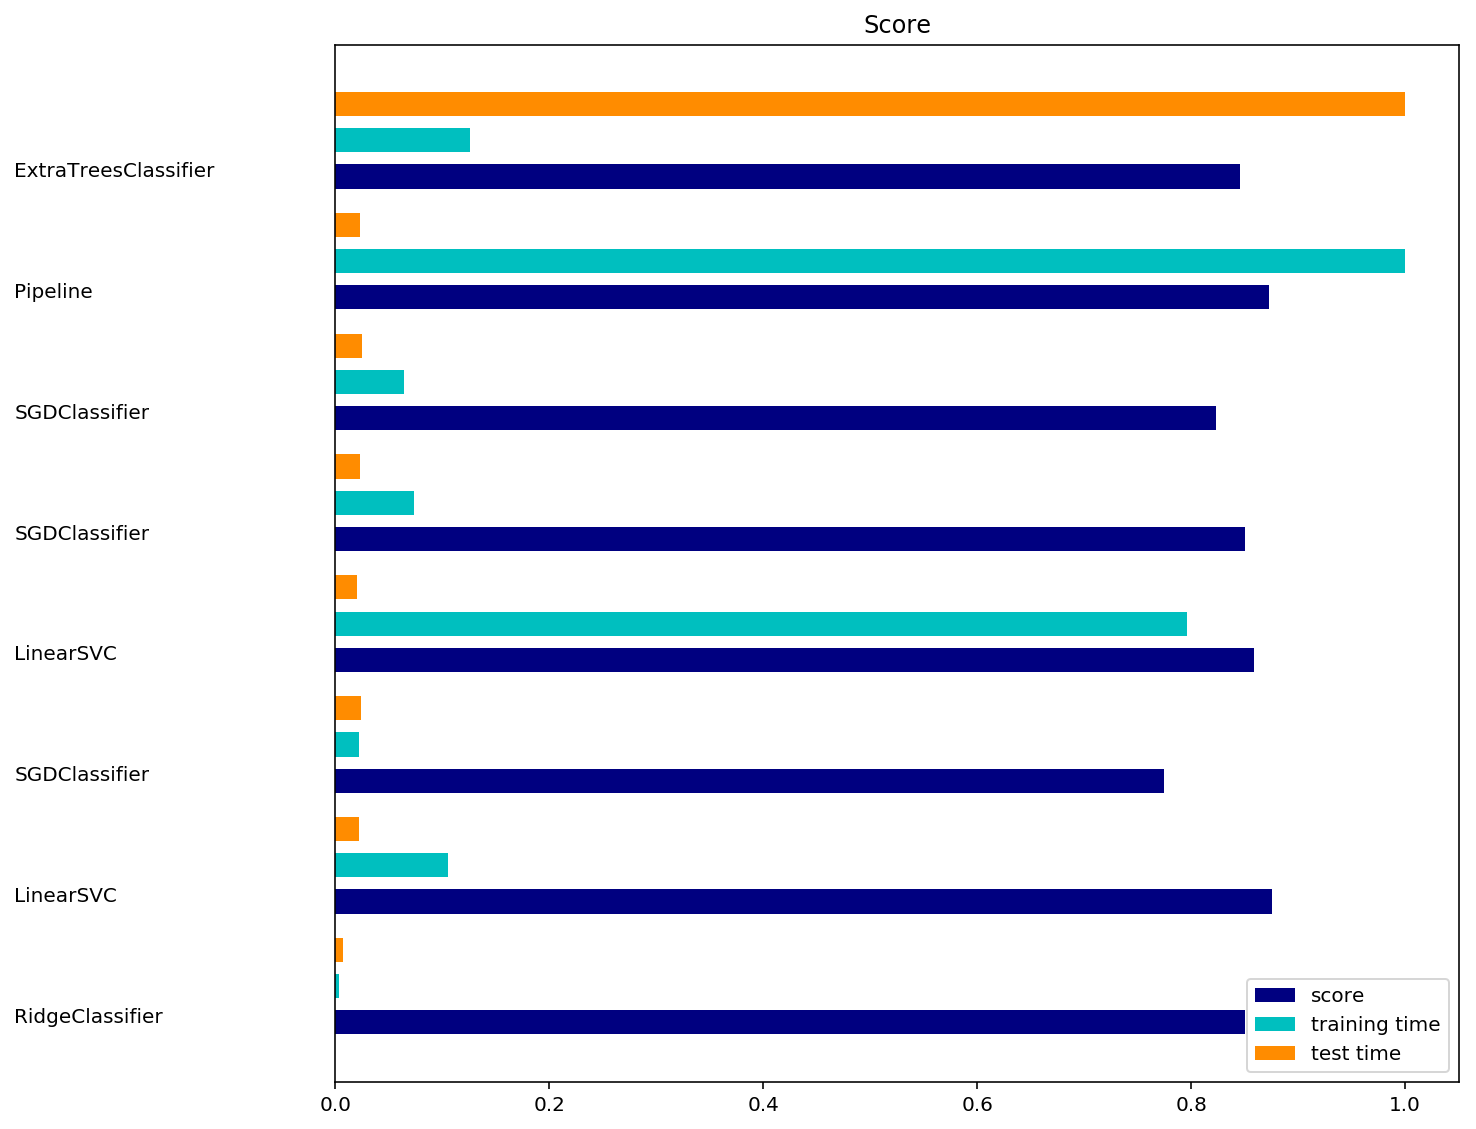

the best model is: LinearSVC, the accuracy is: 0.876


In [17]:
results_model2 = trainandplot(X_w2v_tfidf_train, X_w2v_tfidf_test)
for i in range(0,8):
    if results_model2[1][i] == max(results_model2[1]):
        print ('the best model is: %s, the accuracy is: %0.3f'%(results_model2[0][i], results_model2[1][i]))

In [ ]:
#方法3：依照dictionary维度建立一个新向量表示news，每个维度值为该篇news中所有词与该词相似度的最大值
def document_vector(data):
    X_word2vec =[]
    for document in data:
        document_matrix = []
        for vocab in all_words:
            if vocab in w2v:
                document_matrix.append(max([w2v.similarity(vocab, word) for word in document if word in w2v]))
        X_word2vec.append(document_matrix)
    return X_word2vec

t0 = time()
X_w2vsim_train = document_vector(X_nh_train)
duration = time() - t0
print ("Total X_train procesing time: %0.3f seconds" % duration)

t0 = time()
X_w2vsim_test = document_vector(X_nh_test)
duration = time() - t0
print ("Total X_test procesing time: %0.3f seconds" % duration)

In [ ]:
results_model3 = trainandplot(X_w2vsim_train, X_w2vsim_test)
for i in range(0,8):
    if results_model3[1][i] == max(results_model2[1]):
        print ('the best model is: %s, the accuracy is: %0.3f'%(results_model3[0][i], results_model3[1][i]))

### 完善

2018-05-24 17:57:44,942 INFO collecting all words and their counts
2018-05-24 17:57:44,944 INFO PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-05-24 17:57:45,104 INFO collected 34101 word types from a corpus of 527729 raw words and 3387 sentences
2018-05-24 17:57:45,105 INFO Loading a fresh vocabulary
2018-05-24 17:57:45,402 INFO min_count=5 retains 11737 unique words (34% of original 34101, drops 22364)
2018-05-24 17:57:45,403 INFO min_count=5 leaves 488075 word corpus (92% of original 527729, drops 39654)
2018-05-24 17:57:45,445 INFO deleting the raw counts dictionary of 34101 items
2018-05-24 17:57:45,447 INFO sample=0.001 downsamples 15 most-common words
2018-05-24 17:57:45,448 INFO downsampling leaves estimated 477891 word corpus (97.9% of prior 488075)
2018-05-24 17:57:45,502 INFO estimated required memory for 11737 words and 100 dimensions: 15258100 bytes
2018-05-24 17:57:45,503 INFO resetting layer weights
2018-05-24 17:57:45,673 INFO training model with

Total word2vec processing time: 4.840 seconds
Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='lsqr',
        tol=0.01)
train time: 0.015s
test time:  0.000s
accuracy:   0.848

L2 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.001,
     verbose=0)
train time: 0.308s
test time:  0.000s
accuracy:   0.860

________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='o

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 3.645s
test time:  0.001s
accuracy:   0.856

________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=50,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
train time: 0.187s
test time:  0.001s
accuracy:   0.829

Elastic-Net penalty
________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=50,
       n_jobs=1, penalty='elasticnet', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.259s
test time:  0.000s
accuracy:   0.840

LinearSVC with L1-based feature selection
________________________________________________________________________________
Training: 
Pipeline(memory=None,
     steps=[('feature_selection', SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
     verbose=0),
        norm_order=1, prefit=...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])
train time: 4.354s
test time:  0.001s
accuracy:   0.859

extra trees
________________________________________________________________________________
Training: 
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
         

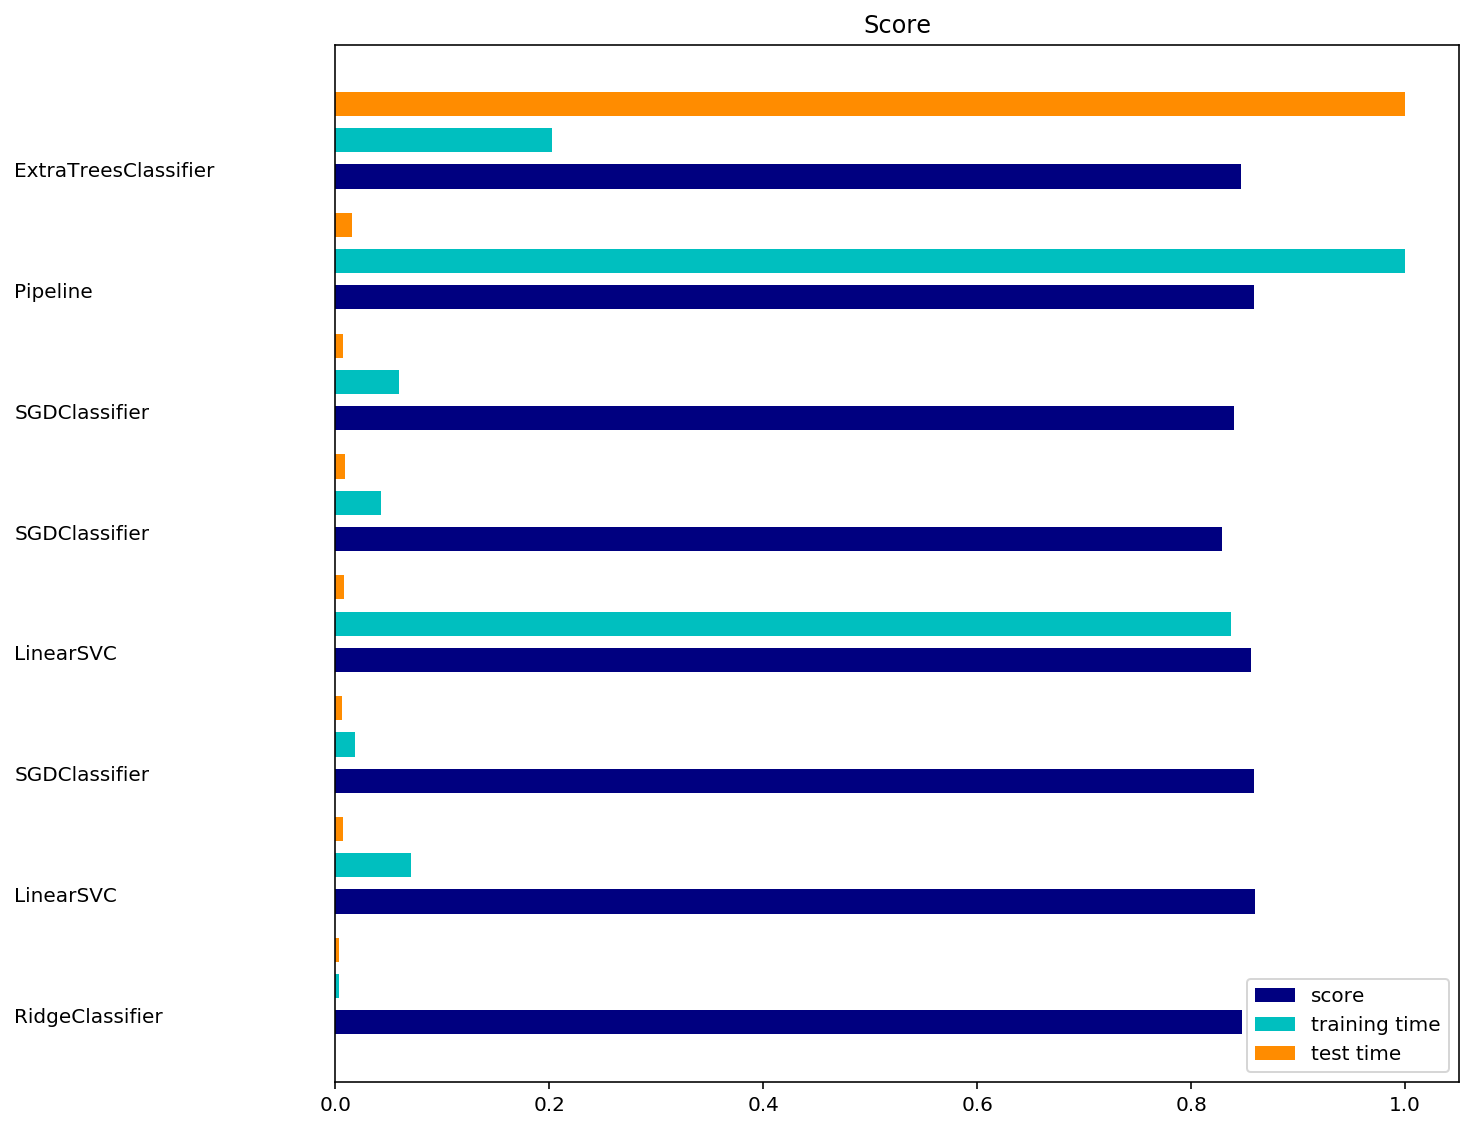

2018-05-24 17:58:02,812 WARNING consider setting layer size to a multiple of 4 for greater performance
2018-05-24 17:58:02,814 INFO collecting all words and their counts
2018-05-24 17:58:02,815 INFO PROGRESS: at sentence #0, processed 0 words, keeping 0 word types


the best model is: LinearSVC, the accuracy is: 0.860


2018-05-24 17:58:02,965 INFO collected 34101 word types from a corpus of 527729 raw words and 3387 sentences
2018-05-24 17:58:02,967 INFO Loading a fresh vocabulary
2018-05-24 17:58:03,029 INFO min_count=5 retains 11737 unique words (34% of original 34101, drops 22364)
2018-05-24 17:58:03,030 INFO min_count=5 leaves 488075 word corpus (92% of original 527729, drops 39654)
2018-05-24 17:58:03,080 INFO deleting the raw counts dictionary of 34101 items
2018-05-24 17:58:03,081 INFO sample=0.001 downsamples 15 most-common words
2018-05-24 17:58:03,083 INFO downsampling leaves estimated 477891 word corpus (97.9% of prior 488075)
2018-05-24 17:58:03,122 INFO estimated required memory for 11737 words and 150 dimensions: 19952900 bytes
2018-05-24 17:58:03,125 INFO resetting layer weights
2018-05-24 17:58:03,310 INFO training model with 4 workers on 11737 vocabulary and 150 features, using sg=0 hs=0 sample=0.001 negative=5 window=30
2018-05-24 17:58:04,322 INFO EPOCH 1 - PROGRESS: at 82.67% exam

Total word2vec processing time: 5.991 seconds
Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='lsqr',
        tol=0.01)
train time: 0.014s
test time:  0.000s
accuracy:   0.849

L2 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.001,
     verbose=0)
train time: 0.447s
test time:  0.002s
accuracy:   0.865

________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='o

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 4.702s
test time:  0.001s
accuracy:   0.862

________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=50,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.321s
test time:  0.001s
accuracy:   0.840

Elastic-Net penalty
________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=50,
       n_jobs=1, penalty='elasticnet', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.334s
test time:  0.001s
accuracy:   0.848

LinearSVC with L1-based feature selection
________________________________________________________________________________
Training: 
Pipeline(memory=None,
     steps=[('feature_selection', SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
     verbose=0),
        norm_order=1, prefit=...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])
train time: 5.696s
test time:  0.001s
accuracy:   0.857

extra trees
________________________________________________________________________________
Training: 
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
         

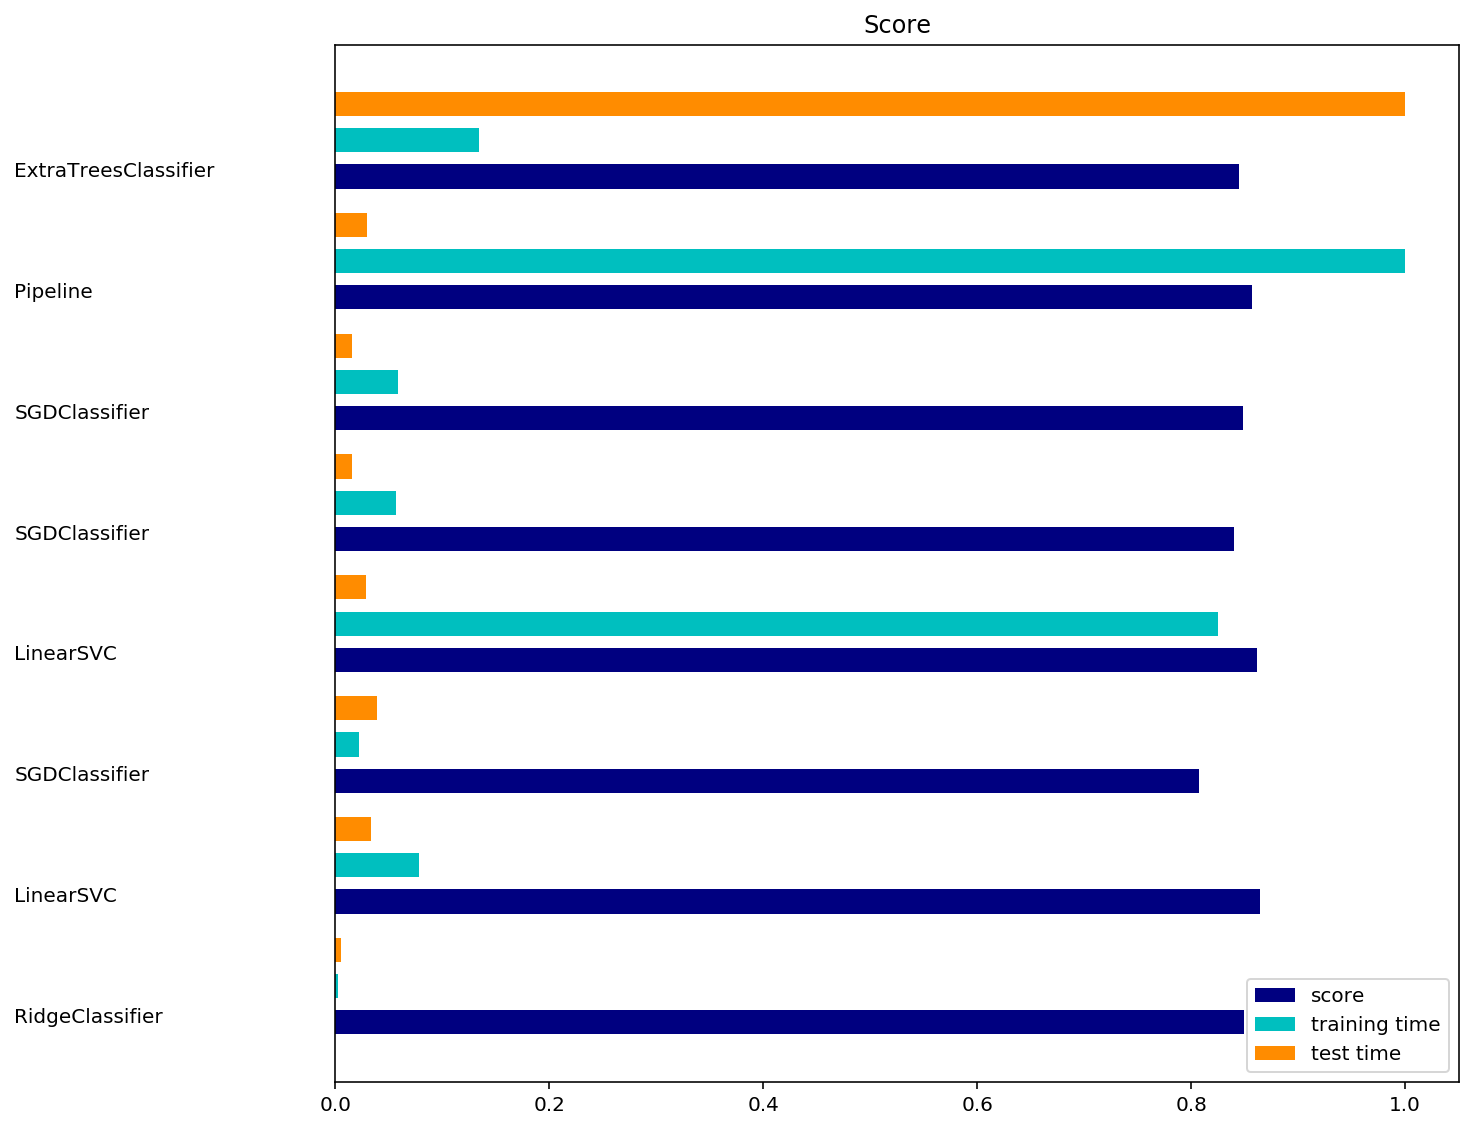

2018-05-24 17:58:24,967 INFO collecting all words and their counts
2018-05-24 17:58:24,968 INFO PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-05-24 17:58:25,087 INFO collected 34101 word types from a corpus of 527729 raw words and 3387 sentences
2018-05-24 17:58:25,088 INFO Loading a fresh vocabulary


the best model is: LinearSVC, the accuracy is: 0.865


2018-05-24 17:58:25,124 INFO min_count=5 retains 11737 unique words (34% of original 34101, drops 22364)
2018-05-24 17:58:25,125 INFO min_count=5 leaves 488075 word corpus (92% of original 527729, drops 39654)
2018-05-24 17:58:25,166 INFO deleting the raw counts dictionary of 34101 items
2018-05-24 17:58:25,168 INFO sample=0.001 downsamples 15 most-common words
2018-05-24 17:58:25,169 INFO downsampling leaves estimated 477891 word corpus (97.9% of prior 488075)
2018-05-24 17:58:25,208 INFO estimated required memory for 11737 words and 200 dimensions: 24647700 bytes
2018-05-24 17:58:25,209 INFO resetting layer weights
2018-05-24 17:58:25,396 INFO training model with 4 workers on 11737 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=30
2018-05-24 17:58:26,289 INFO worker thread finished; awaiting finish of 3 more threads
2018-05-24 17:58:26,307 INFO worker thread finished; awaiting finish of 2 more threads
2018-05-24 17:58:26,313 INFO worker thread finished; a

Total word2vec processing time: 4.704 seconds
Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='lsqr',
        tol=0.01)
train time: 0.012s
test time:  0.000s
accuracy:   0.851

L2 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.001,
     verbose=0)
train time: 0.476s
test time:  0.002s
accuracy:   0.868

________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='o

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 4.773s
test time:  0.001s
accuracy:   0.861

________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=50,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.500s
test time:  0.002s
accuracy:   0.843

Elastic-Net penalty
________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=50,
       n_jobs=1, penalty='elasticnet', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.430s
test time:  0.001s
accuracy:   0.822

LinearSVC with L1-based feature selection
________________________________________________________________________________
Training: 
Pipeline(memory=None,
     steps=[('feature_selection', SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
     verbose=0),
        norm_order=1, prefit=...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])
train time: 6.520s
test time:  0.002s
accuracy:   0.861

extra trees
________________________________________________________________________________
Training: 
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
         

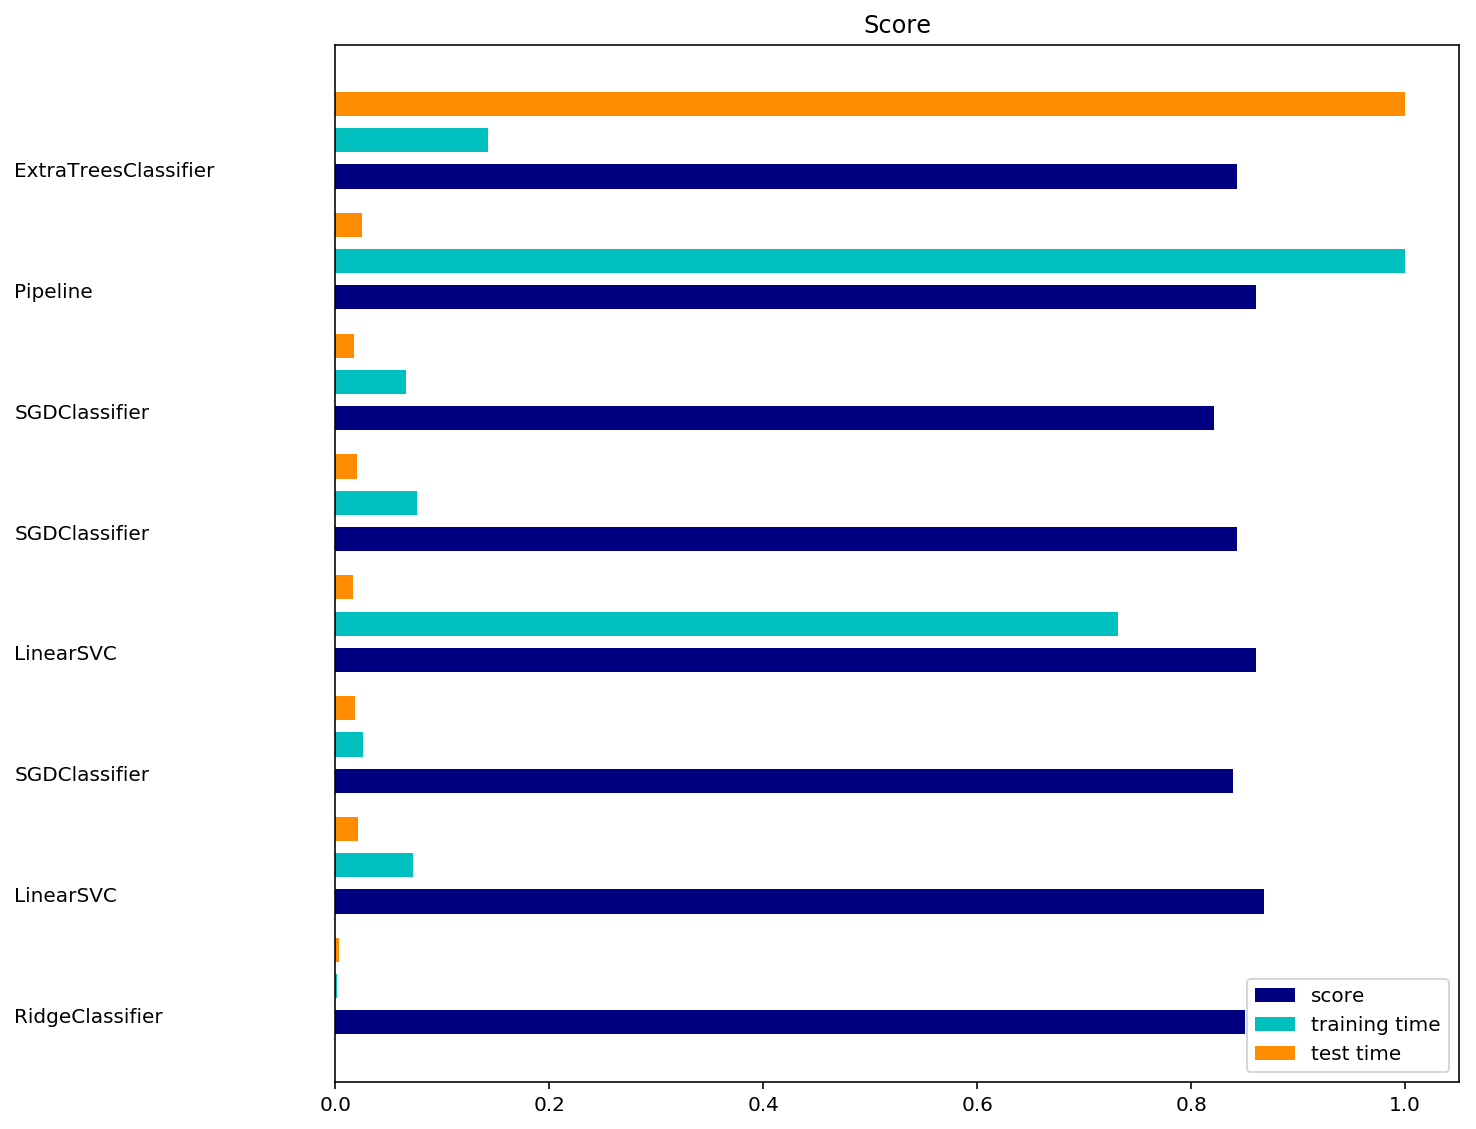

2018-05-24 17:58:46,763 WARNING consider setting layer size to a multiple of 4 for greater performance
2018-05-24 17:58:46,765 INFO collecting all words and their counts
2018-05-24 17:58:46,766 INFO PROGRESS: at sentence #0, processed 0 words, keeping 0 word types


the best model is: LinearSVC, the accuracy is: 0.868


2018-05-24 17:58:46,952 INFO collected 34101 word types from a corpus of 527729 raw words and 3387 sentences
2018-05-24 17:58:46,953 INFO Loading a fresh vocabulary
2018-05-24 17:58:47,141 INFO min_count=5 retains 11737 unique words (34% of original 34101, drops 22364)
2018-05-24 17:58:47,142 INFO min_count=5 leaves 488075 word corpus (92% of original 527729, drops 39654)
2018-05-24 17:58:47,196 INFO deleting the raw counts dictionary of 34101 items
2018-05-24 17:58:47,198 INFO sample=0.001 downsamples 15 most-common words
2018-05-24 17:58:47,200 INFO downsampling leaves estimated 477891 word corpus (97.9% of prior 488075)
2018-05-24 17:58:47,249 INFO estimated required memory for 11737 words and 250 dimensions: 29342500 bytes
2018-05-24 17:58:47,255 INFO resetting layer weights
2018-05-24 17:58:47,497 INFO training model with 4 workers on 11737 vocabulary and 250 features, using sg=0 hs=0 sample=0.001 negative=5 window=30
2018-05-24 17:58:48,519 INFO EPOCH 1 - PROGRESS: at 69.59% exam

Total word2vec processing time: 6.679 seconds
Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='lsqr',
        tol=0.01)
train time: 0.019s
test time:  0.000s
accuracy:   0.851

L2 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.001,
     verbose=0)
train time: 0.746s
test time:  0.001s
accuracy:   0.874

________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='o

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.206s
test time:  0.001s
accuracy:   0.830

L1 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
     verbose=0)
train time: 5.721s
test time:  0.001s
accuracy:   0.870

________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=50,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.616s
test time:  0.002s
accuracy:   0.851

Elastic-Net penalty
________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=50,
       n_jobs=1, penalty='elasticnet', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.550s
test time:  0.001s
accuracy:   0.830

LinearSVC with L1-based feature selection
________________________________________________________________________________
Training: 
Pipeline(memory=None,
     steps=[('feature_selection', SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
     verbose=0),
        norm_order=1, prefit=...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])
train time: 7.206s
test time:  0.002s
accuracy:   0.871

extra trees
________________________________________________________________________________
Training: 
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
         

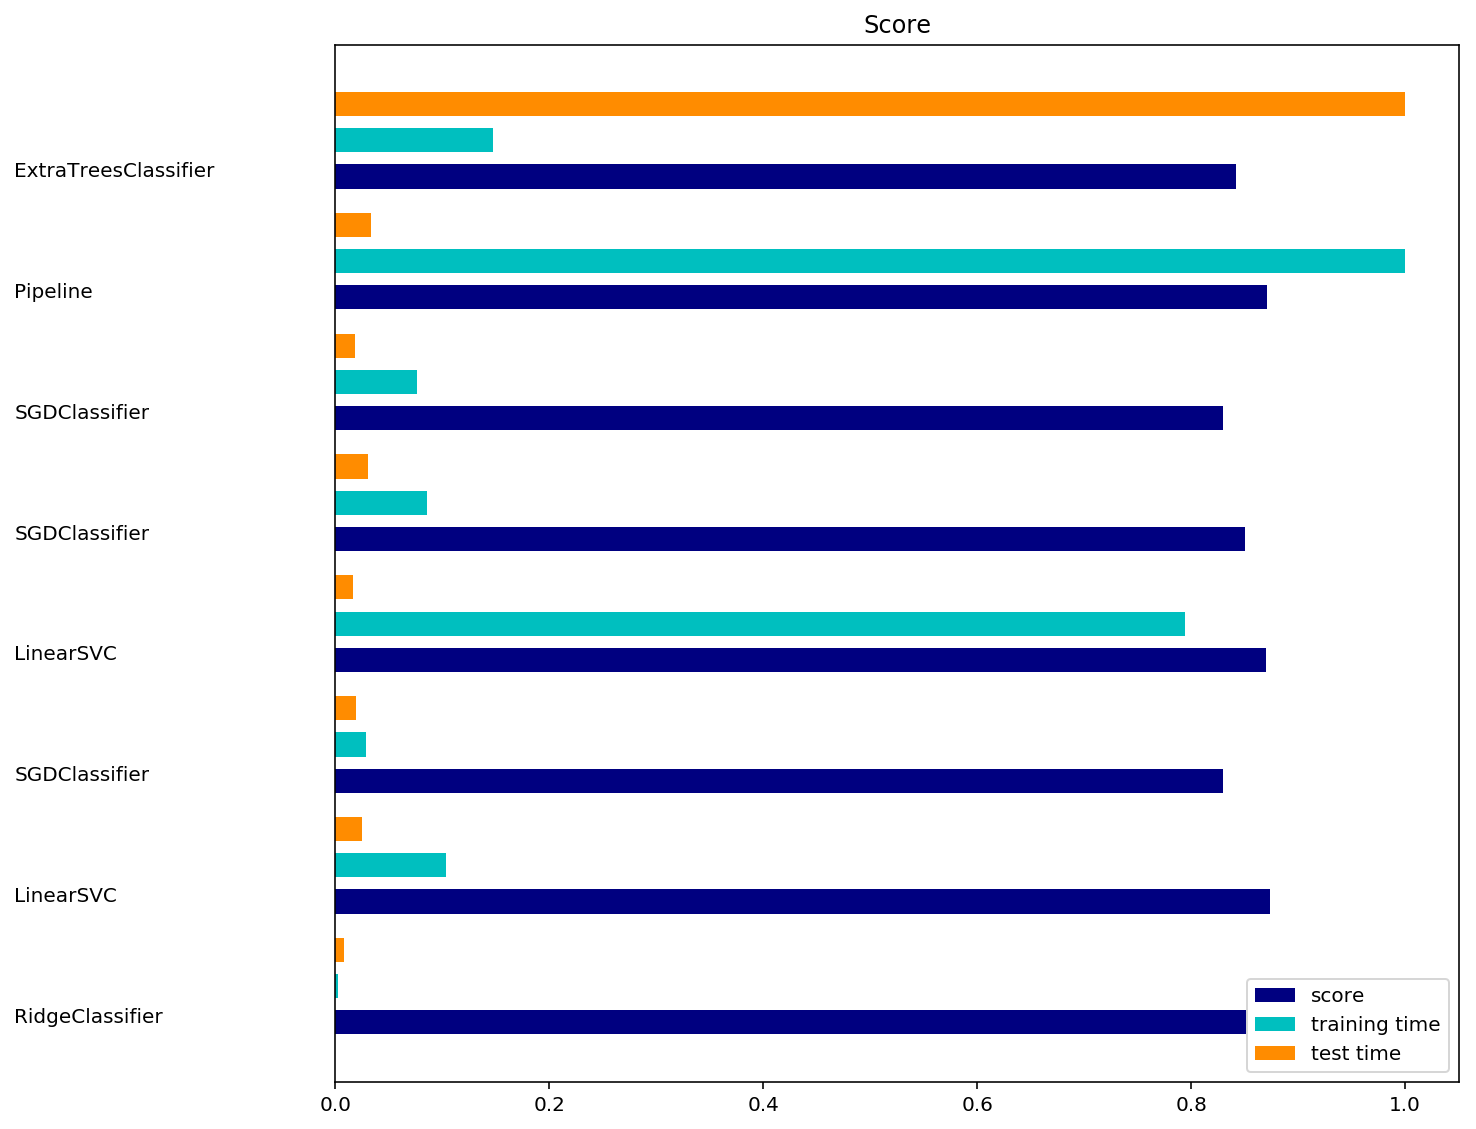

2018-05-24 17:59:13,182 INFO collecting all words and their counts
2018-05-24 17:59:13,184 INFO PROGRESS: at sentence #0, processed 0 words, keeping 0 word types


the best model is: LinearSVC, the accuracy is: 0.874


2018-05-24 17:59:13,345 INFO collected 34101 word types from a corpus of 527729 raw words and 3387 sentences
2018-05-24 17:59:13,346 INFO Loading a fresh vocabulary
2018-05-24 17:59:13,421 INFO min_count=5 retains 11737 unique words (34% of original 34101, drops 22364)
2018-05-24 17:59:13,422 INFO min_count=5 leaves 488075 word corpus (92% of original 527729, drops 39654)
2018-05-24 17:59:13,484 INFO deleting the raw counts dictionary of 34101 items
2018-05-24 17:59:13,486 INFO sample=0.001 downsamples 15 most-common words
2018-05-24 17:59:13,488 INFO downsampling leaves estimated 477891 word corpus (97.9% of prior 488075)
2018-05-24 17:59:13,535 INFO estimated required memory for 11737 words and 300 dimensions: 34037300 bytes
2018-05-24 17:59:13,537 INFO resetting layer weights
2018-05-24 17:59:13,794 INFO training model with 4 workers on 11737 vocabulary and 300 features, using sg=0 hs=0 sample=0.001 negative=5 window=30
2018-05-24 17:59:14,809 INFO EPOCH 1 - PROGRESS: at 72.07% exam

Total word2vec processing time: 6.985 seconds
Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='lsqr',
        tol=0.01)
train time: 0.019s
test time:  0.020s
accuracy:   0.854

L2 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.001,
     verbose=0)
train time: 0.889s
test time:  0.002s
accuracy:   0.871

________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='o

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.243s
test time:  0.002s
accuracy:   0.846

L1 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
     verbose=0)
train time: 6.717s
test time:  0.002s
accuracy:   0.857

________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=50,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.592s
test time:  0.002s
accuracy:   0.847

Elastic-Net penalty
________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=50,
       n_jobs=1, penalty='elasticnet', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.581s
test time:  0.002s
accuracy:   0.836

LinearSVC with L1-based feature selection
________________________________________________________________________________
Training: 
Pipeline(memory=None,
     steps=[('feature_selection', SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
     verbose=0),
        norm_order=1, prefit=...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])
train time: 8.018s
test time:  0.006s
accuracy:   0.868

extra trees
________________________________________________________________________________
Training: 
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
         

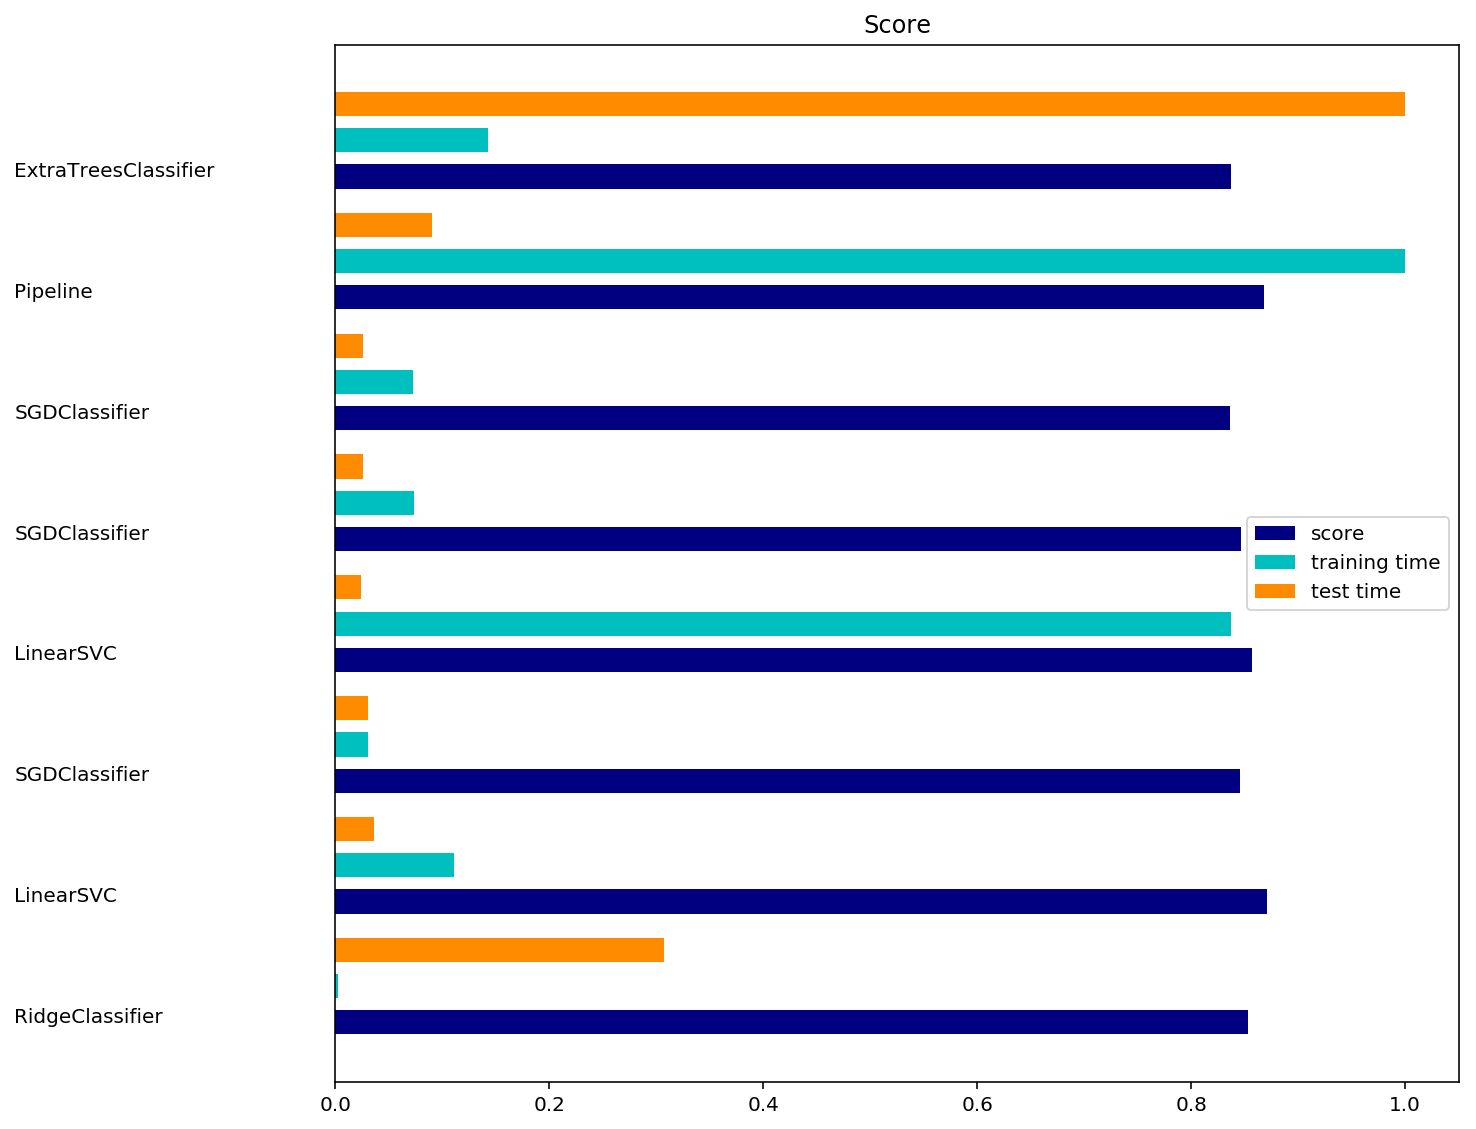

the best model is: LinearSVC, the accuracy is: 0.871


In [12]:
#调参
result_parameter_adjust = []
for size in range(100, 301, 50):
    t0 = time()
    all_data_nh = np.append(X_nh_train, X_nh_test)
    all_words = set(word for document in all_data_nh for word in document)
    model = Word2Vec(all_data_nh, size=size, alpha=0.05, window=30, min_count=5, workers=multiprocessing.cpu_count())
    w2v = model.wv
    duration = time() - t0
    print ("Total word2vec processing time: %0.3f seconds" % duration)
    
    X_w2v_tfidf_train = w2v_tfidf(X_nh_train)
    X_w2v_tfidf_test = w2v_tfidf(X_nh_test)
    
    results_model2 = trainandplot(X_w2v_tfidf_train, X_w2v_tfidf_test)
    for i in range(0,8):
        if results_model2[1][i] == max(results_model2[1]):
            print ('the best model is: %s, the accuracy is: %0.3f'%(results_model2[0][i], results_model2[1][i]))
            result_parameter_adjust.append([results_model2[0][i], results_model2[1][i]])

#对最好的模型进行词干提取和词形还原，看看是否有所提高

In [13]:
print(result_parameter_adjust)

[['LinearSVC', 0.8595713229859572], ['LinearSVC', 0.8647450110864745], ['LinearSVC', 0.868440502586844], ['LinearSVC', 0.8736141906873615], ['LinearSVC', 0.8713968957871396]]


## IV. 结果
### 模型的评价与验证


### 合理性分析

## V. 项目结论
### 结果可视化


### 对项目的思考

### 需要作出的改进
